In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

df = pd.read_csv('clean8.csv')
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(3)

(855794, 54)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,1997-02-28,84.0,4.0,...,NaN,2004-02-28,1,730.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,1997-02-28,60.0,2.0,...,NaN,2002-02-28,0,92.0,NaN,0.0,0.0,0.0,0.0,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,1997-02-28,180.0,7.0,...,NaN,2012-02-28,0,306.0,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df_copy = df_copy[(df_copy['DisbursementDate_year'] >= 2000) & (df_copy['DisbursementDate_year'] <= 2010)]
print(df_copy.shape)
df_copy.head(3)

(530453, 54)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006-02-07,162.000,2.000,...,NaN,2019-08-07,1,52.000,NaN,0.000,0.000,0.000,0.000,0.000
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006-02-07,126.000,7.000,...,NaN,2016-08-07,1,82.000,NaN,0.000,0.000,0.000,0.000,1.000
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006-02-07,83.000,18.000,...,106321.347,2013-01-07,1,21.000,NaN,0.000,0.000,0.000,0.000,0.000


In [13]:
df_copy['DisbursePerMonth'] = df_copy['DisbursementGross'] / df_copy['Term']
df_copy['BankLoss'] = df_copy['ChgOffPrinGr'] - df_copy['SBA_Appv']
df_copy.loc[list(df_copy[df_copy['BankLoss'] < 0].index), 'BankLoss'] = 0
df_copy['BankLoss%'] = df_copy['BankLoss'] / df_copy['DisbursementGross'] * 100

In [29]:
df_copy.to_csv('clean9.csv', index=False)

In [6]:
obj_features = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry',
                'ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month', 'State_division', 'RealEstate',
                'GreatRecession', 'DotCom', 'Recession', 'Mon_Is_14710', 'Is_Cross_State']
num_features = ['Default', 'ChgOffPrinGr', 'Term', 'DisbursementGross', 'Bank%', 'DisbursePerEmployee',
                'USDPerJobCreated','NoEmp', 'CreateJob', 'RetainedJob', 'Population', 'PopDensity', 'GrAppv', 'SBA_Appv',
                'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome', 'Appv_Dusburse_delta', 'DisbursePerMonth']
time_cols = ['ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']

df_groupby_mean = dict()
df_groupby_size = dict()
df_groupby_sum = dict()

for col in obj_features:
    df_groupby_mean[col] = df_copy.groupby(by=col).mean()[num_features]
    df_groupby_sum[col] = df_copy.groupby(by=col).sum()[num_features]
    df_groupby_size[col] = pd.DataFrame(df_copy.groupby(by=col).size())
    df_groupby_size[col].rename(columns={0: 'size'}, inplace=True)

In [7]:
display(df_copy.iloc[:3,:23])
display(df_copy.iloc[:3,23:])

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,IsFranchised,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,Default,ChgOffPrinGr
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006-02-07,162.000,2.000,...,1.000,1,0.000,0.000,NaN,2006-03-31,307175.719,0.000,0.000,NaN
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006-02-07,126.000,7.000,...,0.000,1,0.000,0.000,NaN,2006-04-30,166437.357,0.000,0.000,NaN
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006-02-07,83.000,18.000,...,0.000,1,1.000,0.000,NaN,2006-02-28,531606.737,0.000,0.000,NaN


,GrAppv,SBA_Appv,Industry,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,...,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710,DisbursePerMonth,BankLoss
12,307175.719,230381.789,Retail_trade,NaN,NaN,NaN,2006.000,3.000,31.000,2006.000,...,1,52.000,NaN,0.000,0.000,0.000,0.000,0.000,1896.146,NaN
24,166437.357,141471.753,Accom/Food_serv,NaN,NaN,NaN,2006.000,4.000,30.000,2006.000,...,1,82.000,NaN,0.000,0.000,0.000,0.000,1.000,1320.931,NaN
28,121221.673,60610.836,Educational,NaN,NaN,NaN,2006.000,2.000,28.000,2006.000,...,1,21.000,NaN,0.000,0.000,0.000,0.000,0.000,6404.900,NaN


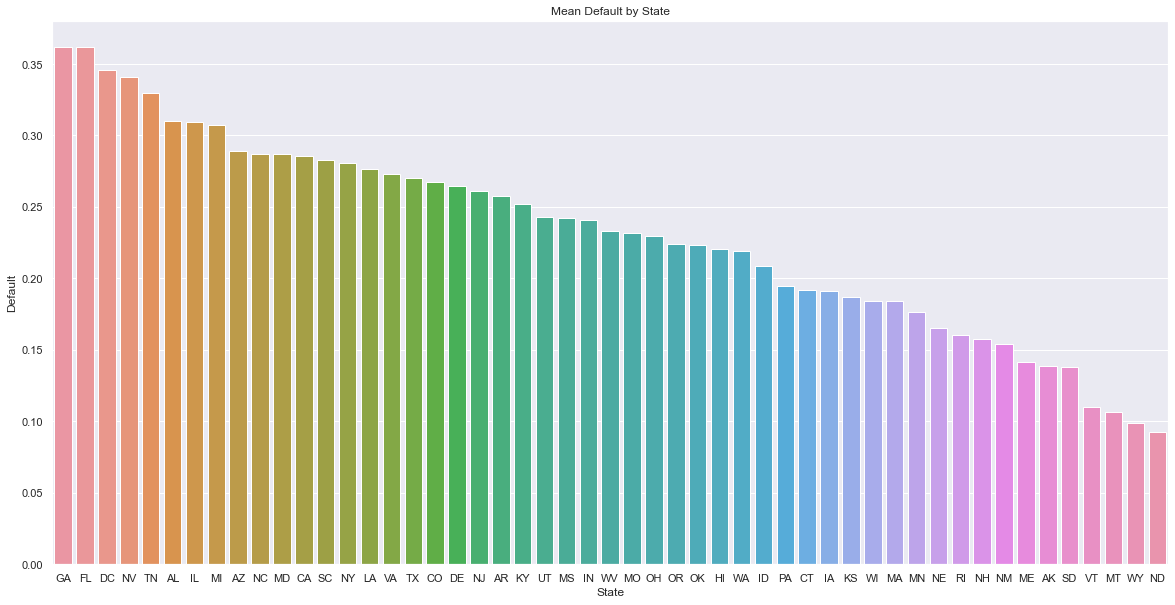

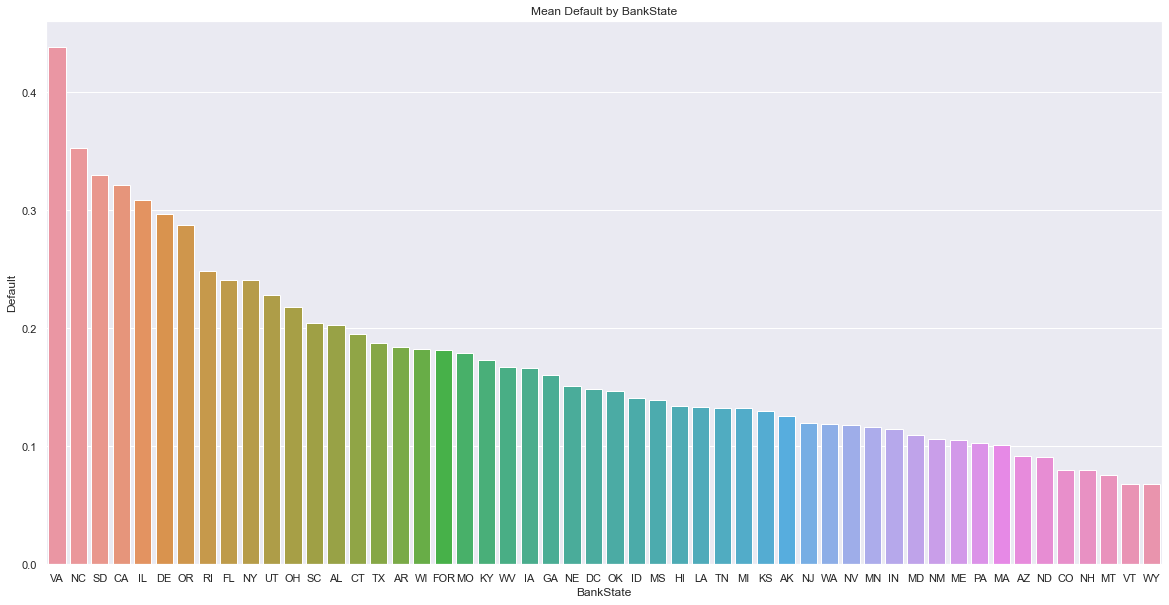

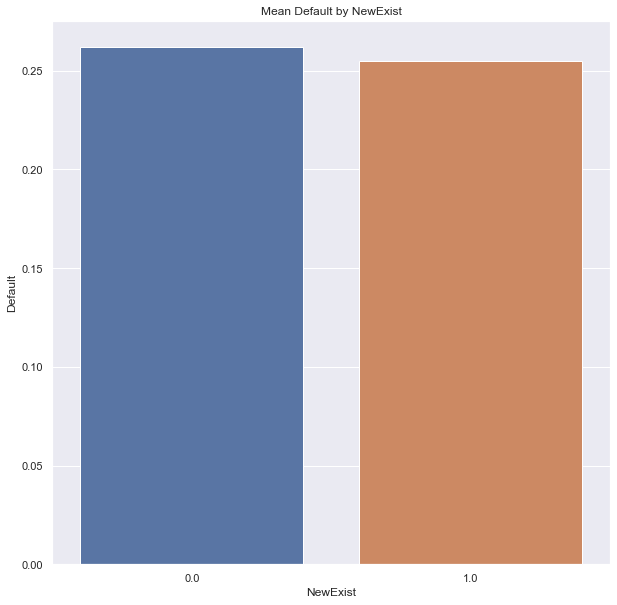

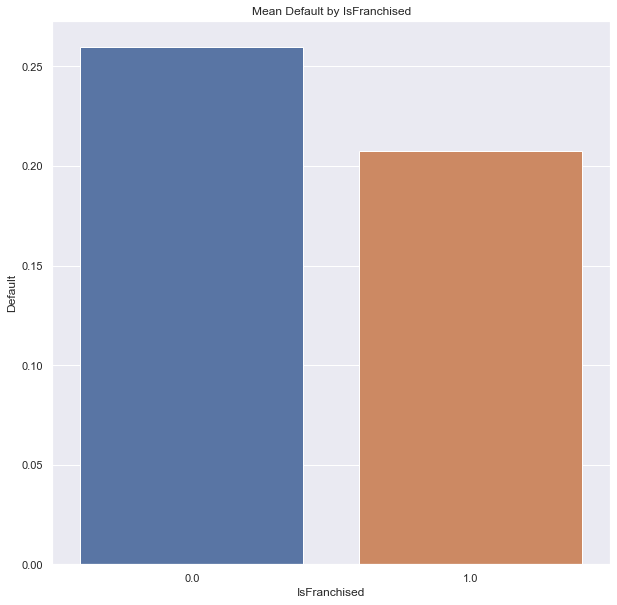

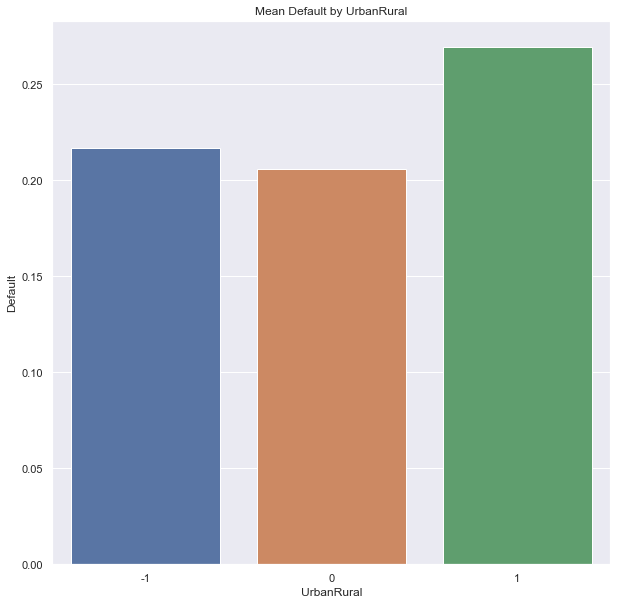

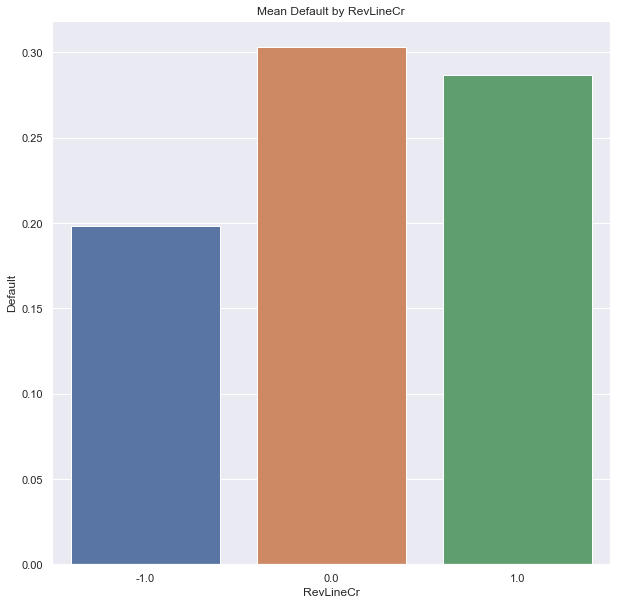

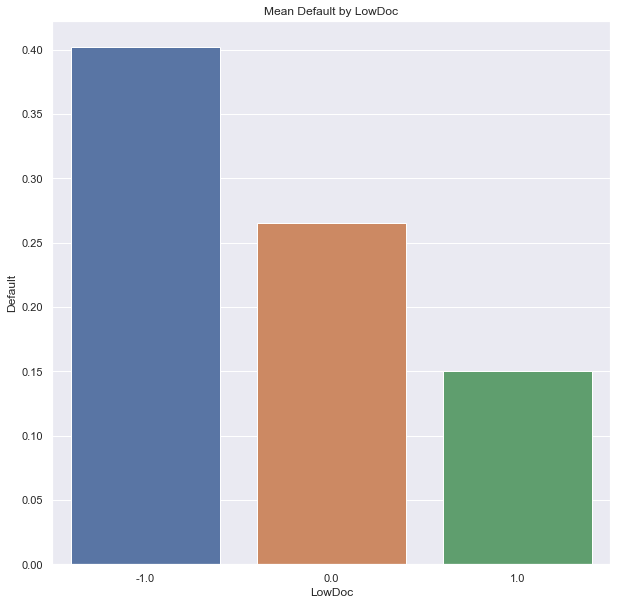

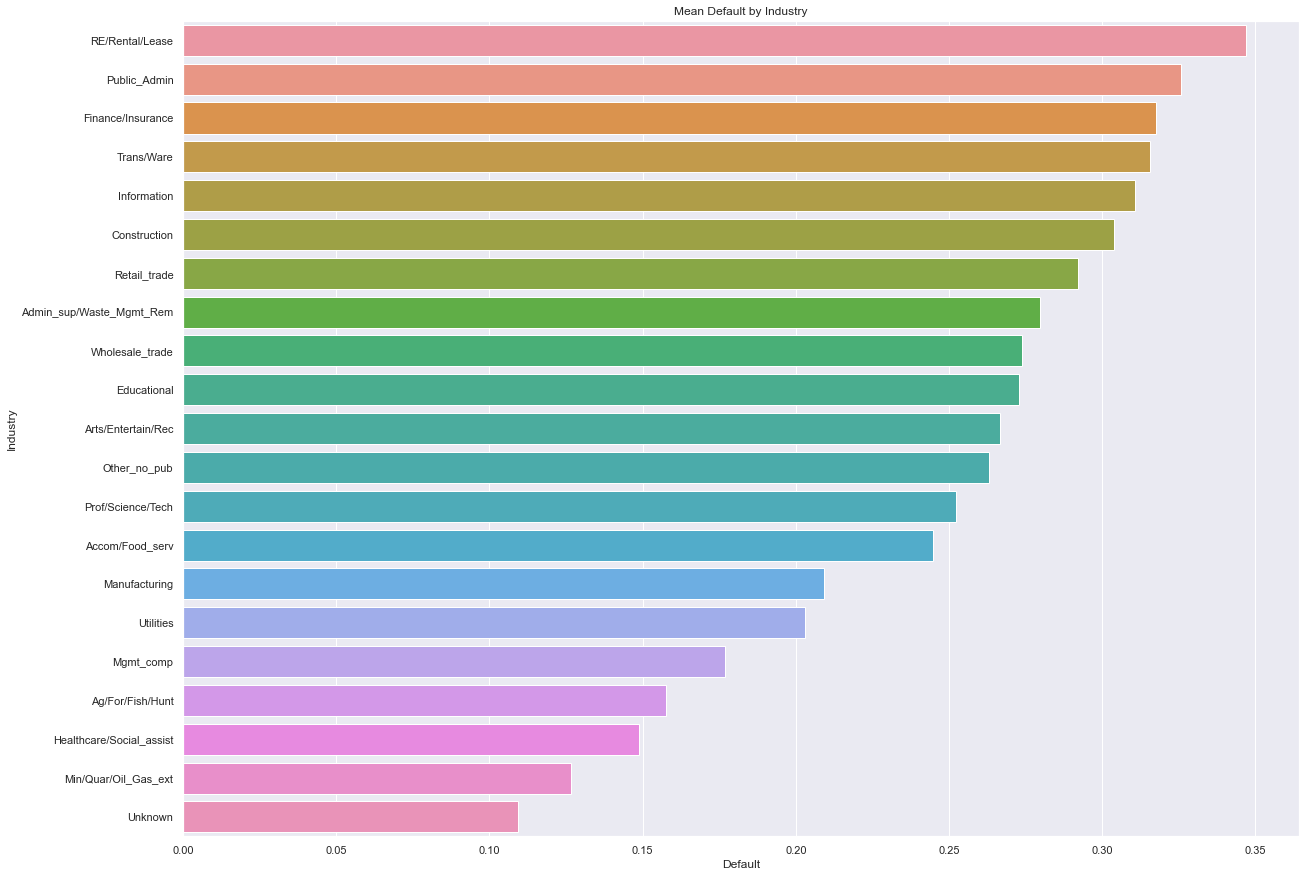

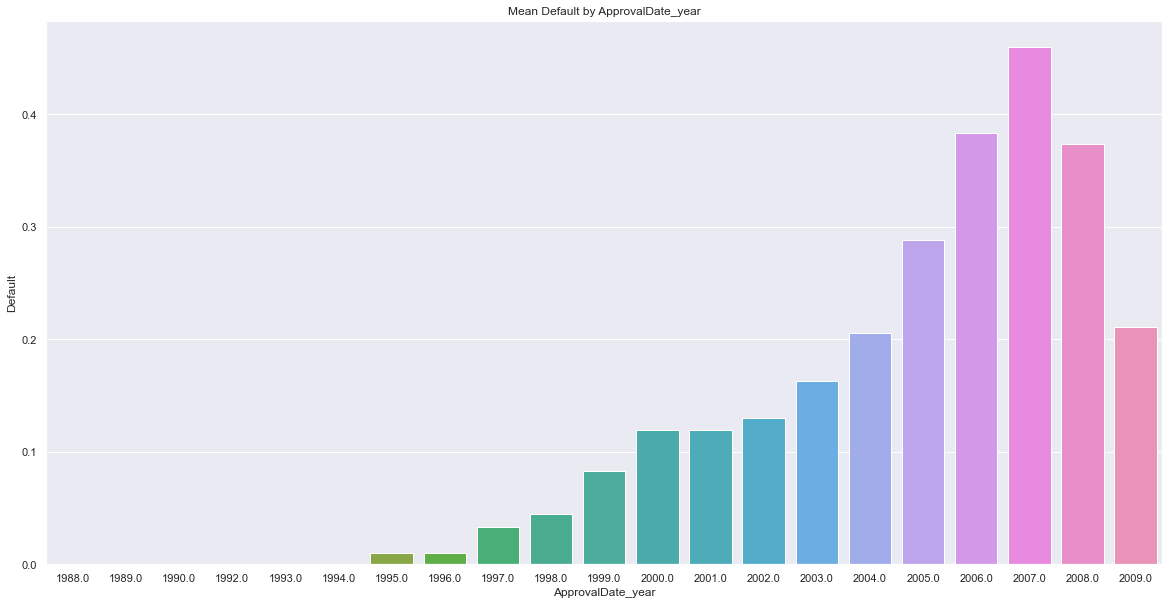

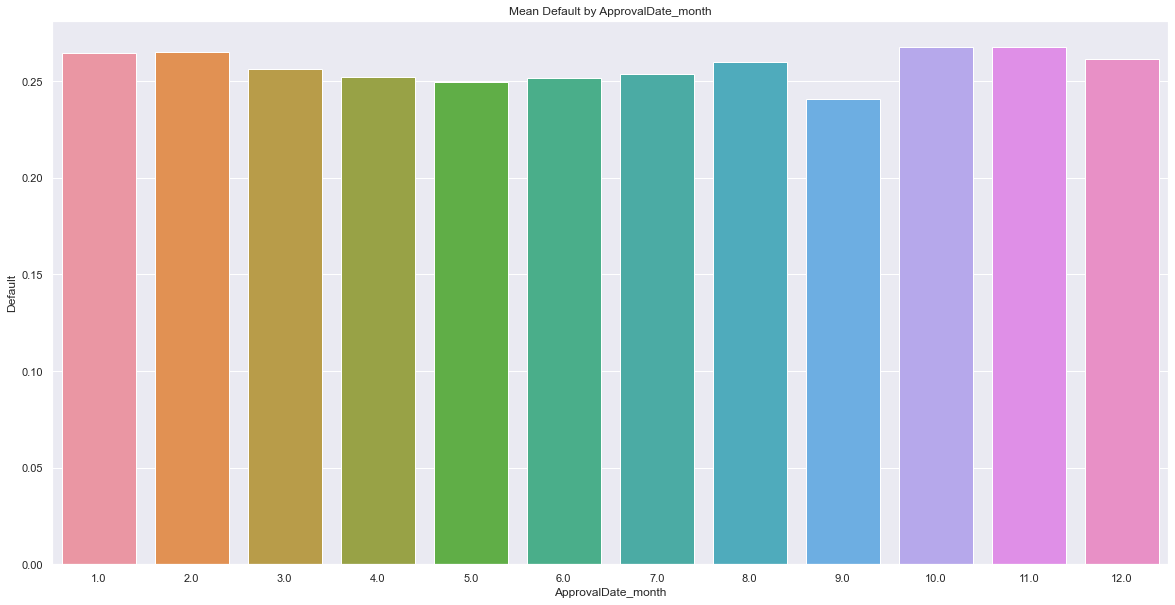

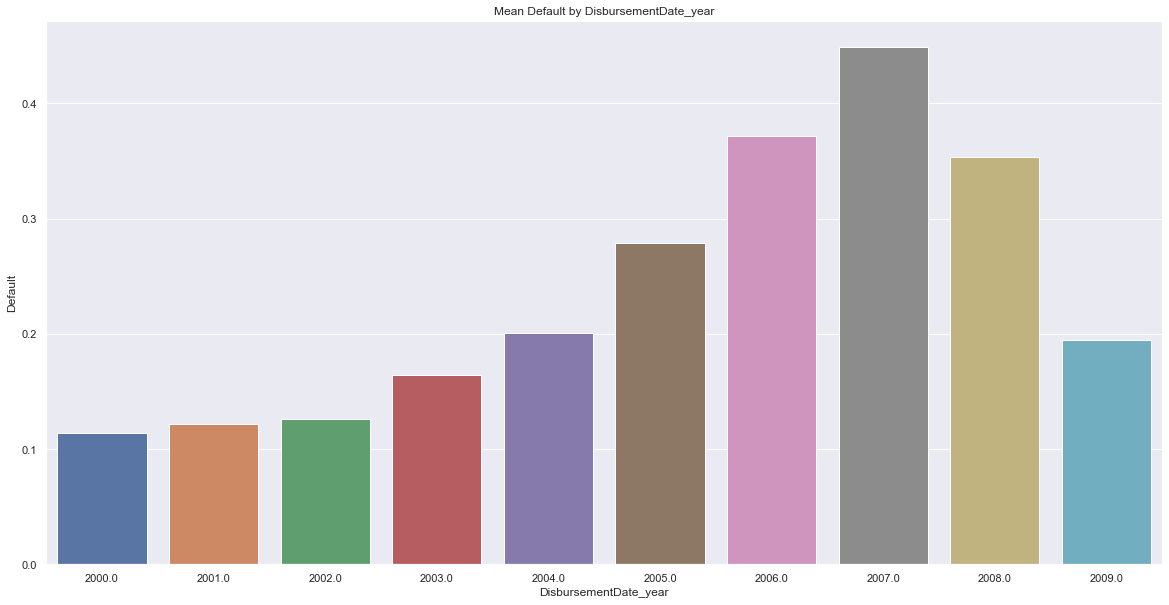

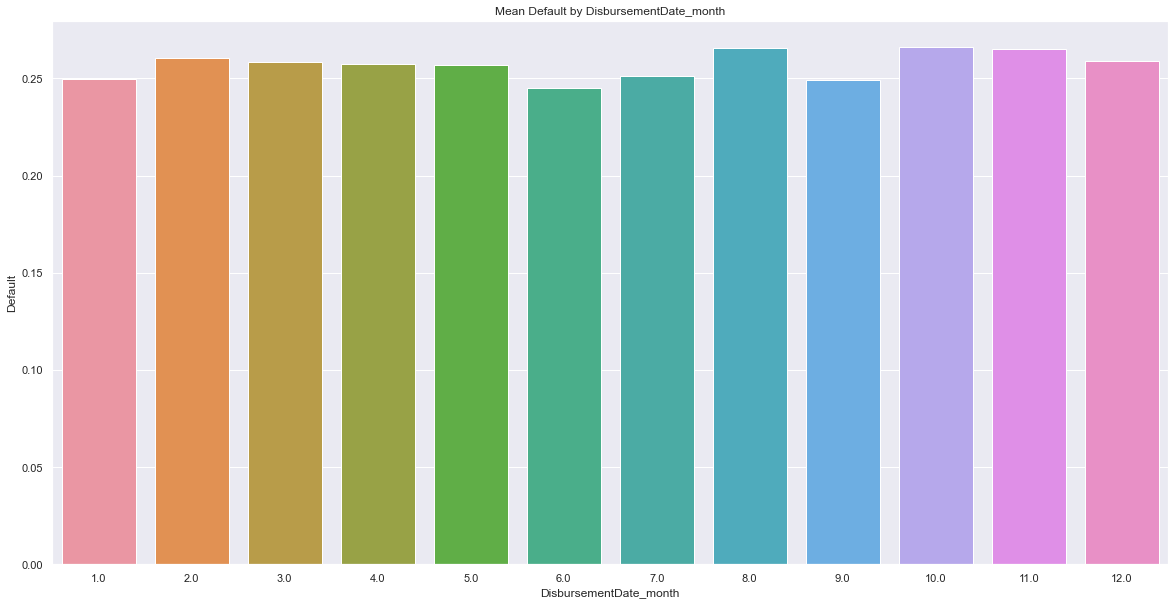

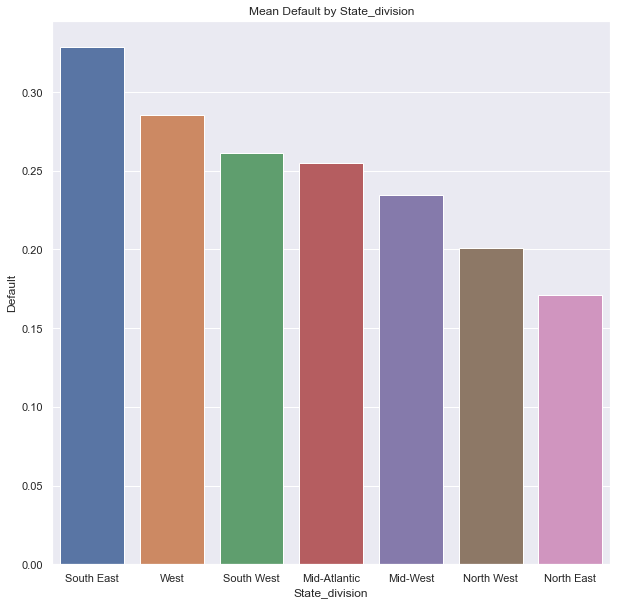

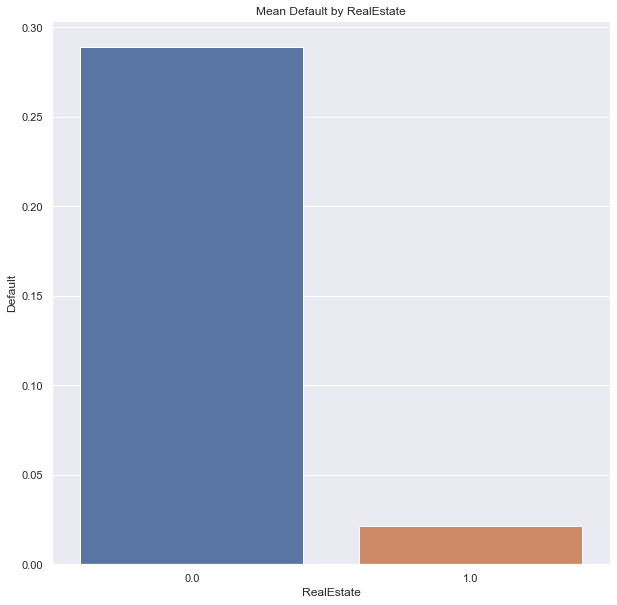

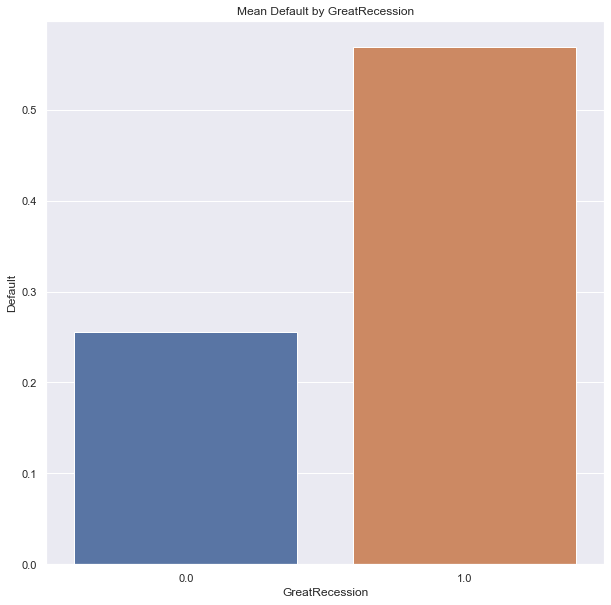

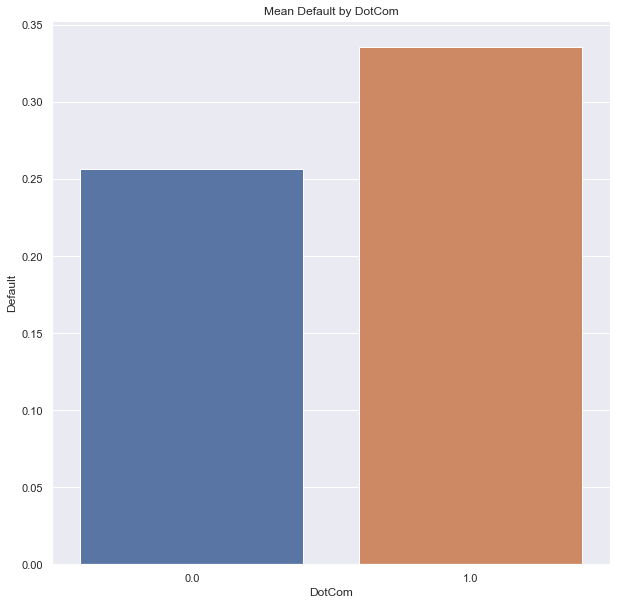

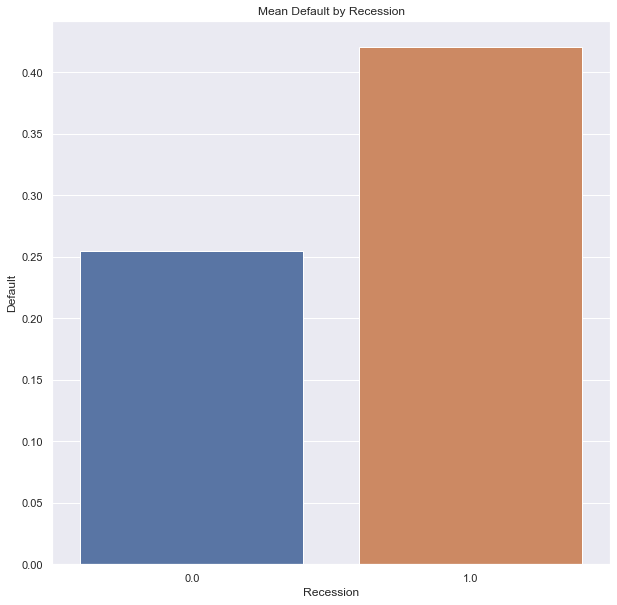

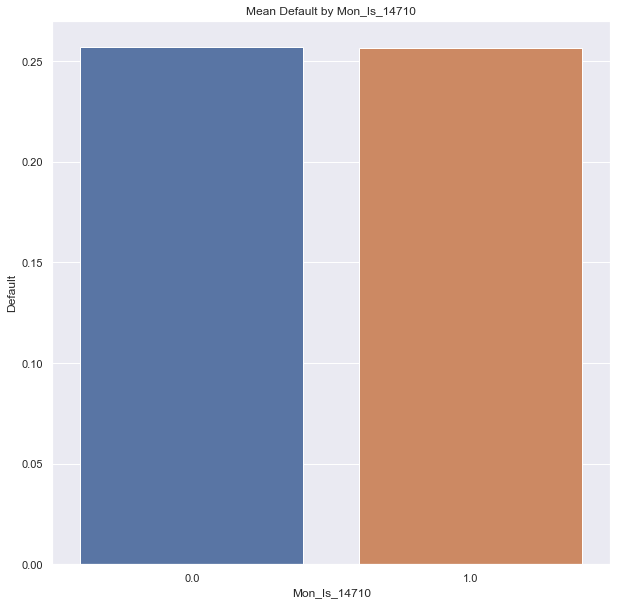

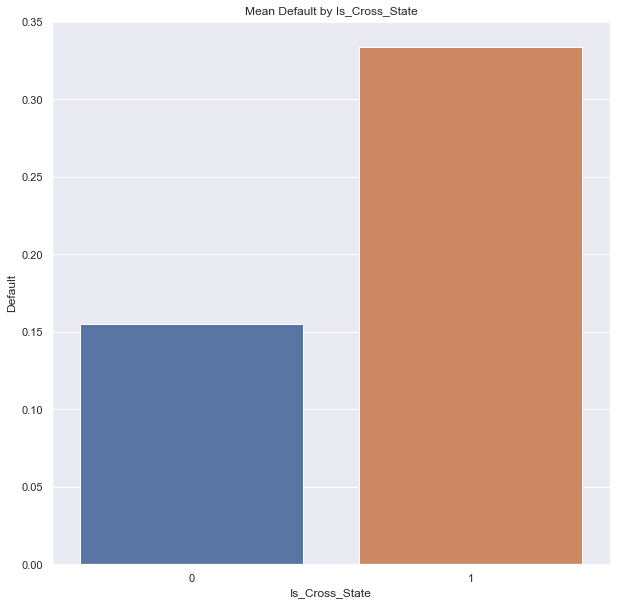

In [12]:
num = 'Default'
for i in range(len(obj_features)):
    if df_copy[obj_features[i]].nunique() < 8:
            plt.figure(figsize=(10, 10))
    elif obj_features[i] == 'Industry':
        plt.figure(figsize=(20, 15))
        vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
        title = 'Mean Default by '+ obj_features[i]
        plt.title(title)
        sns.set_theme(style="darkgrid")
        plt.grid(True)
        sns.barplot(y=vis.index, x=vis[num])
        plt.savefig(title + '.jpeg')
        plt.show()
        continue
    else:
        plt.figure(figsize=(20, 10))
    vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
    title = 'Mean Default by '+ obj_features[i]
    plt.title(title)
    sns.set_theme(style="darkgrid")
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig(title + '.jpeg')
    plt.show()

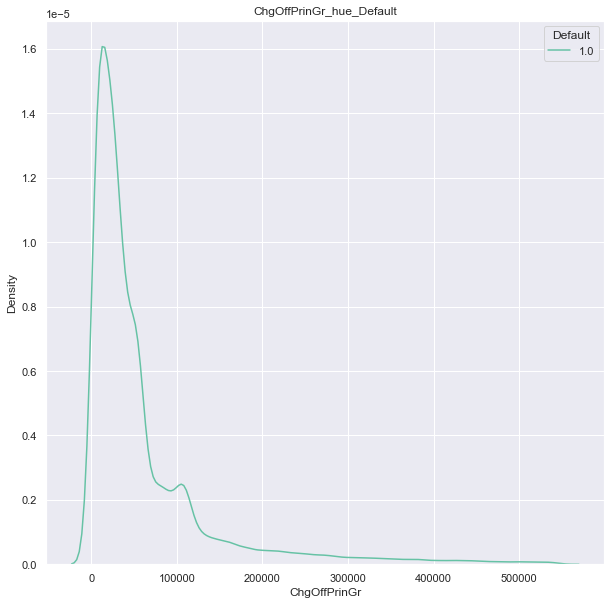

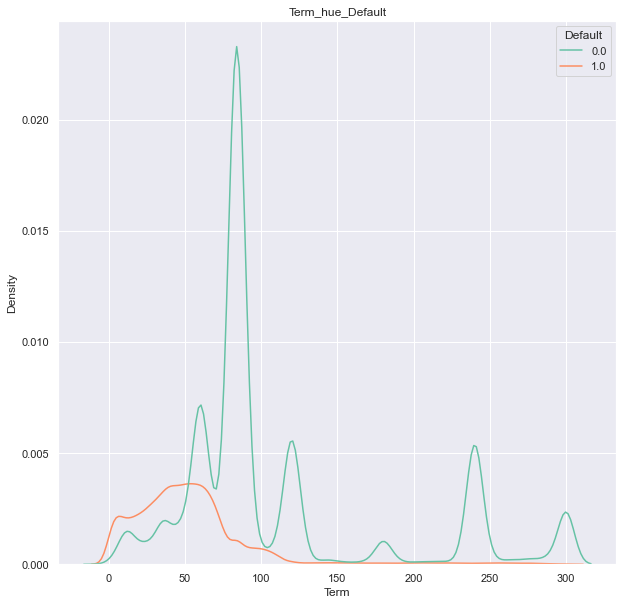

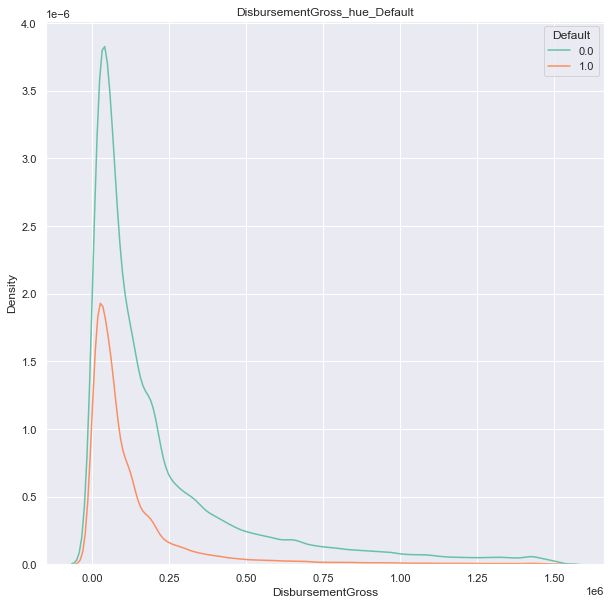

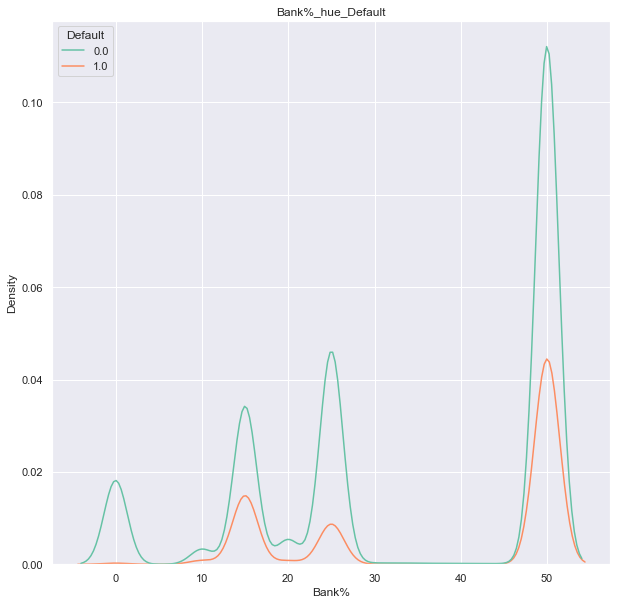

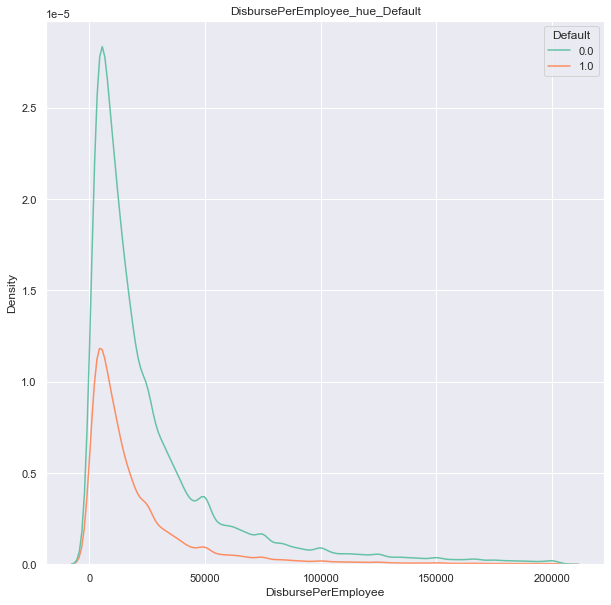

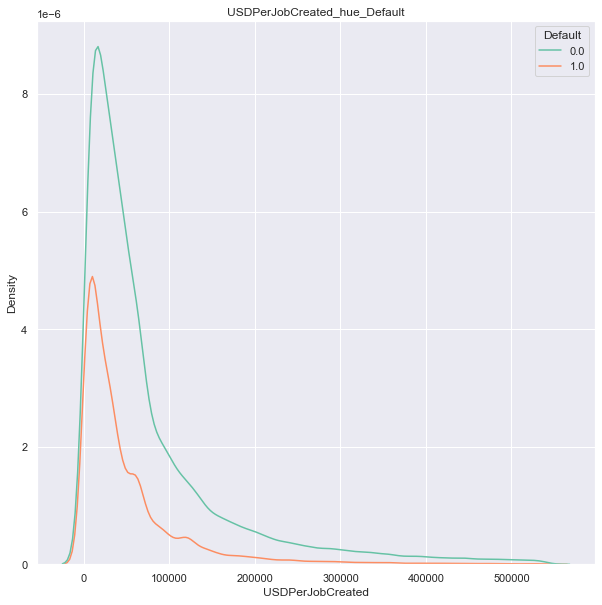

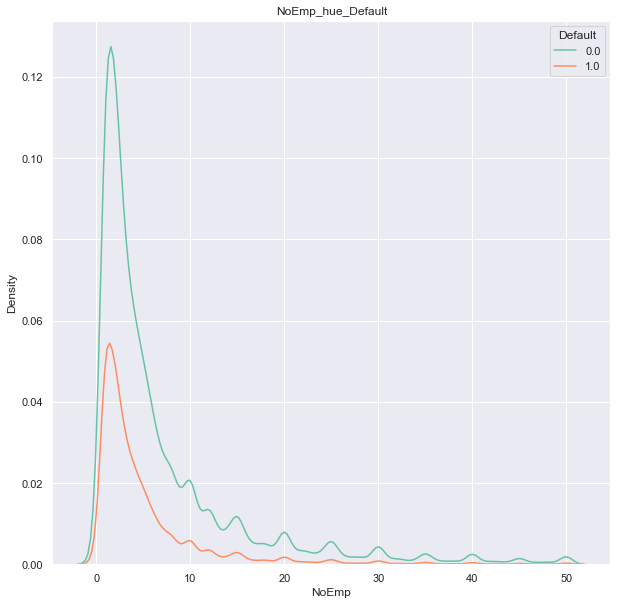

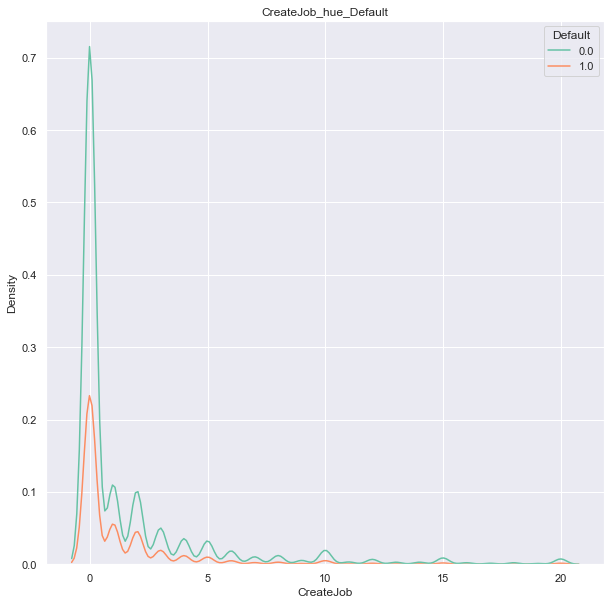

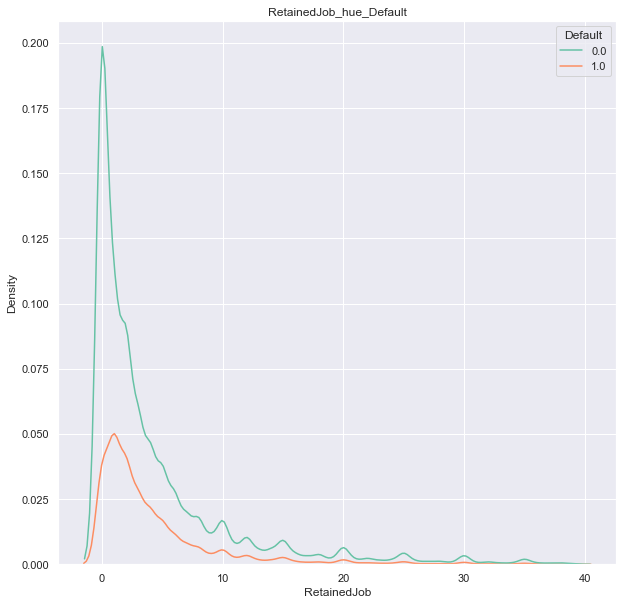

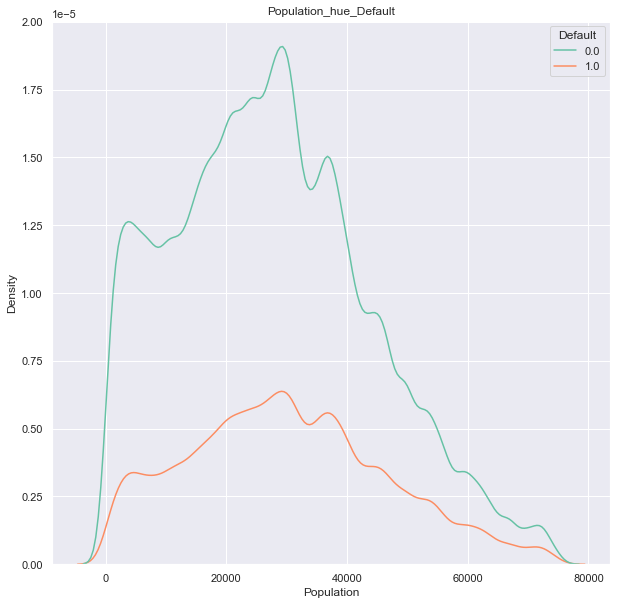

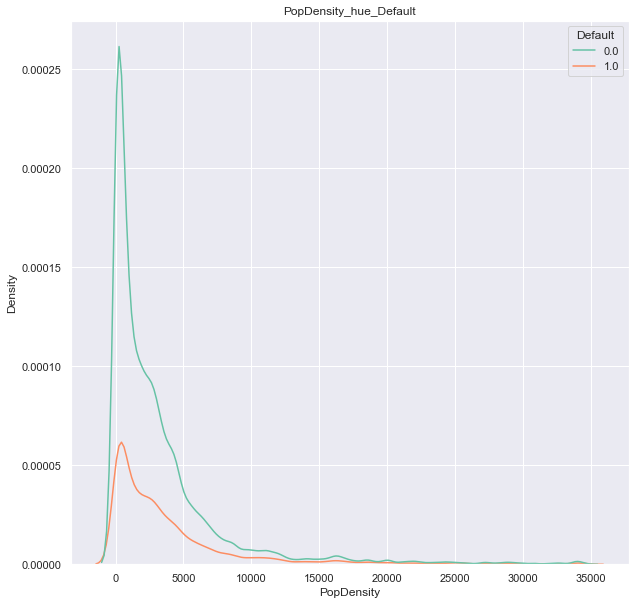

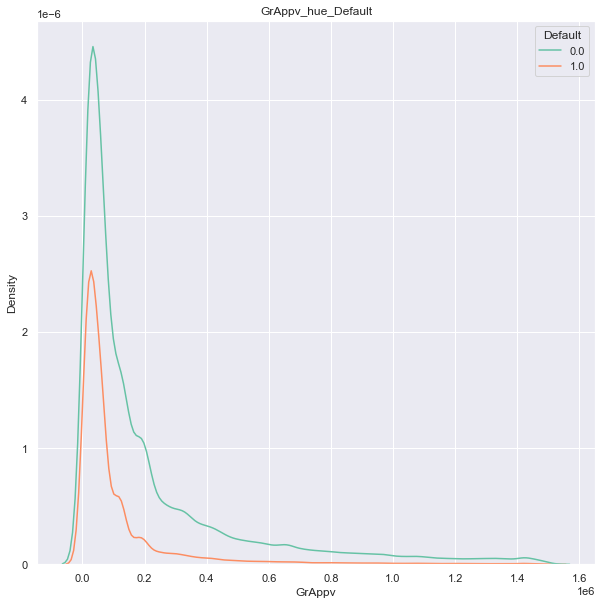

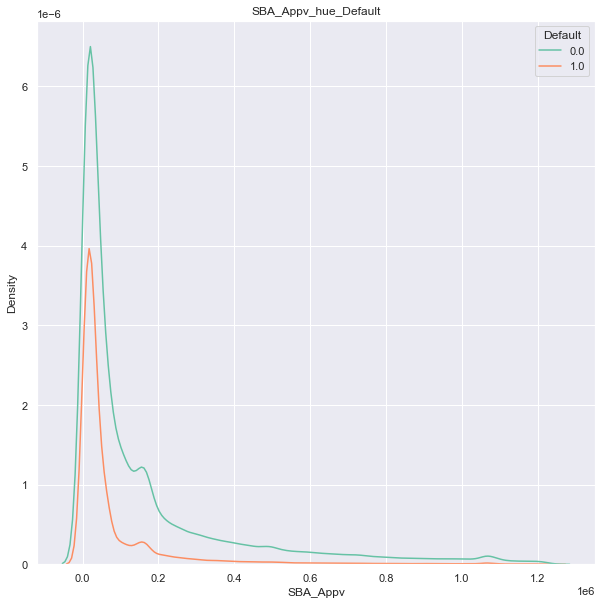

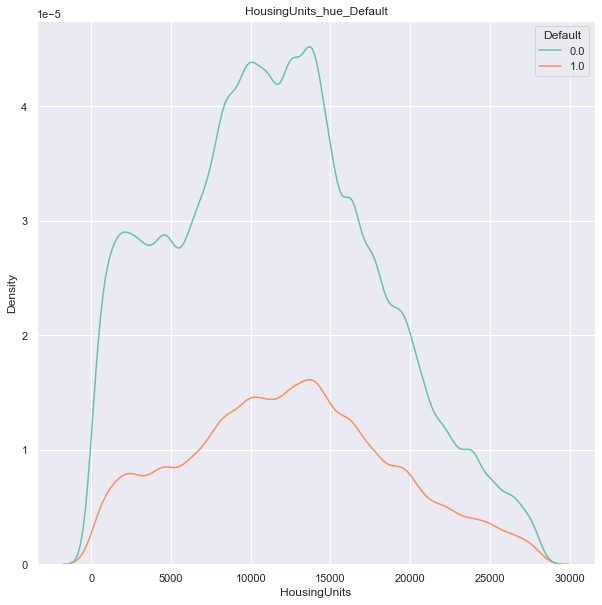

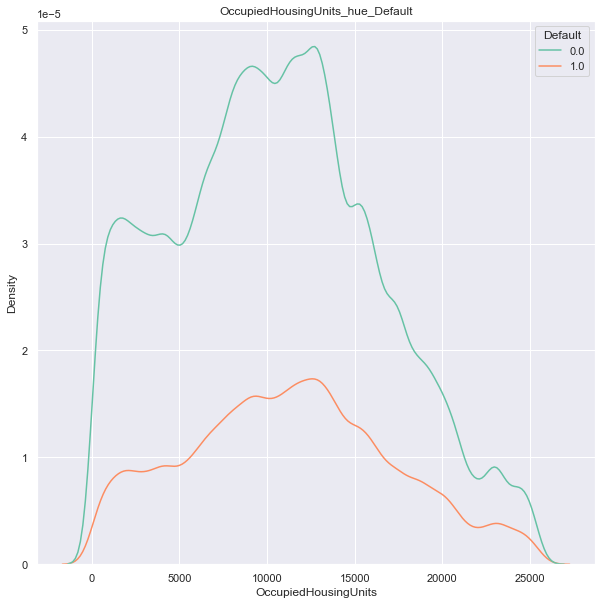

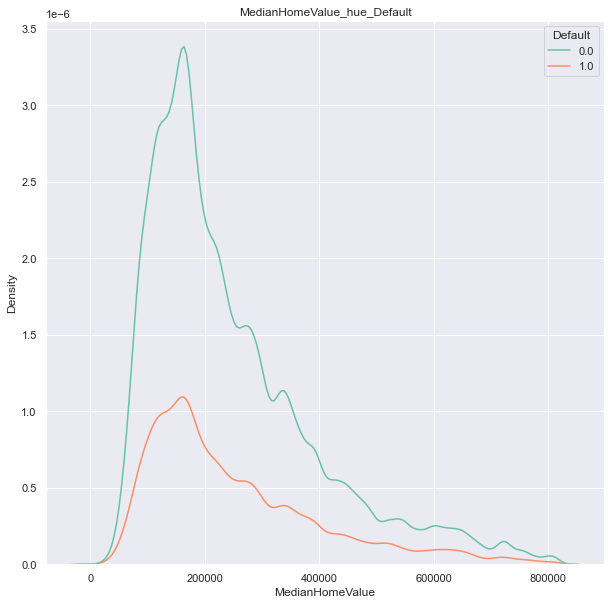

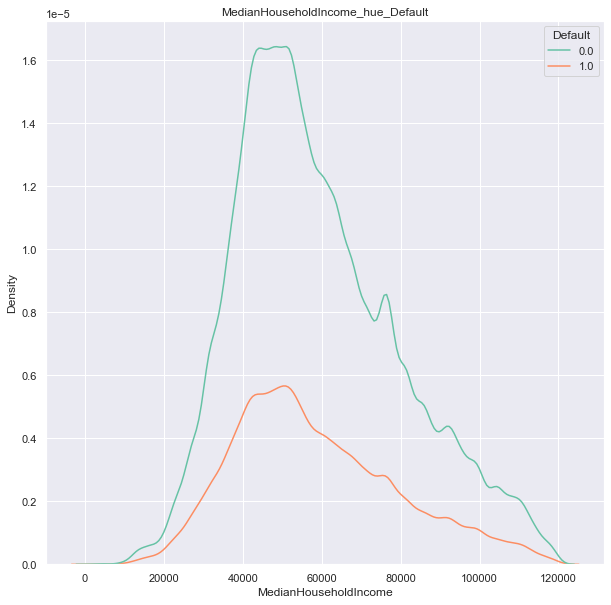

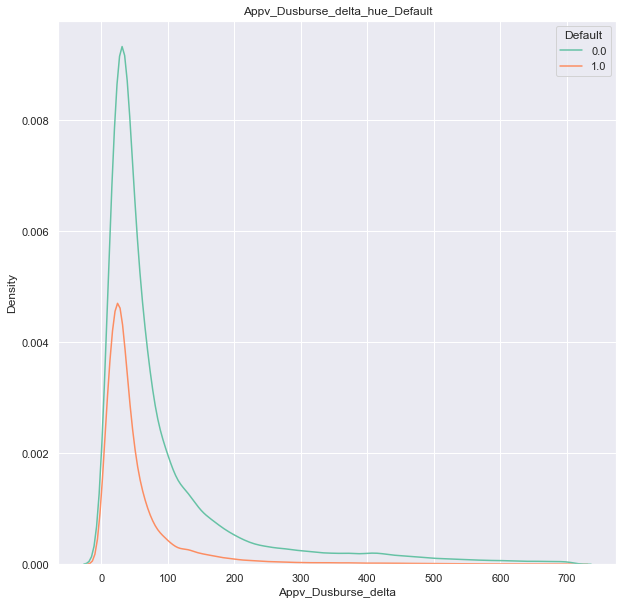

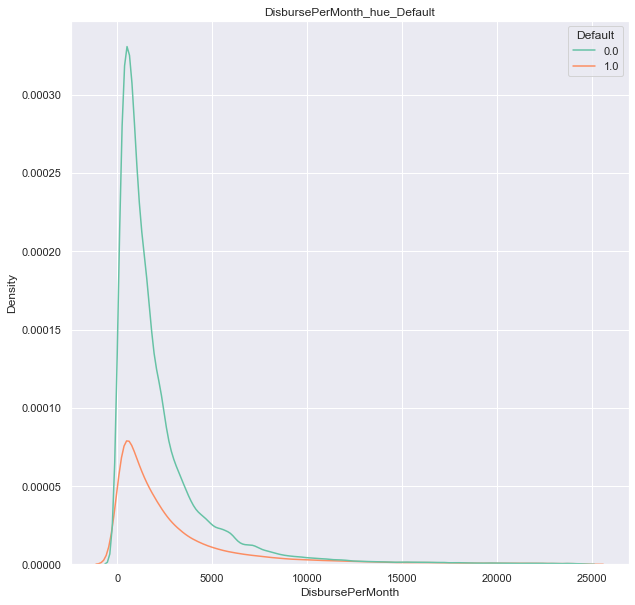

In [17]:
num_visualization_with_hue(df_copy, num_features, hue_col='Default', exclude_outlier=1)

In [24]:
%run function.ipynb

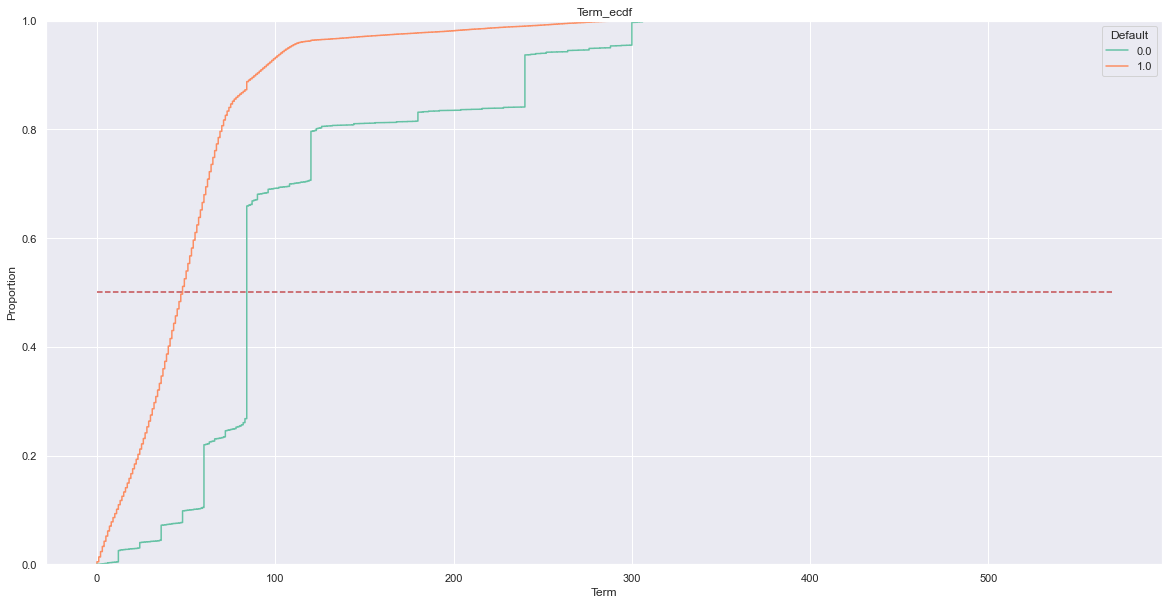

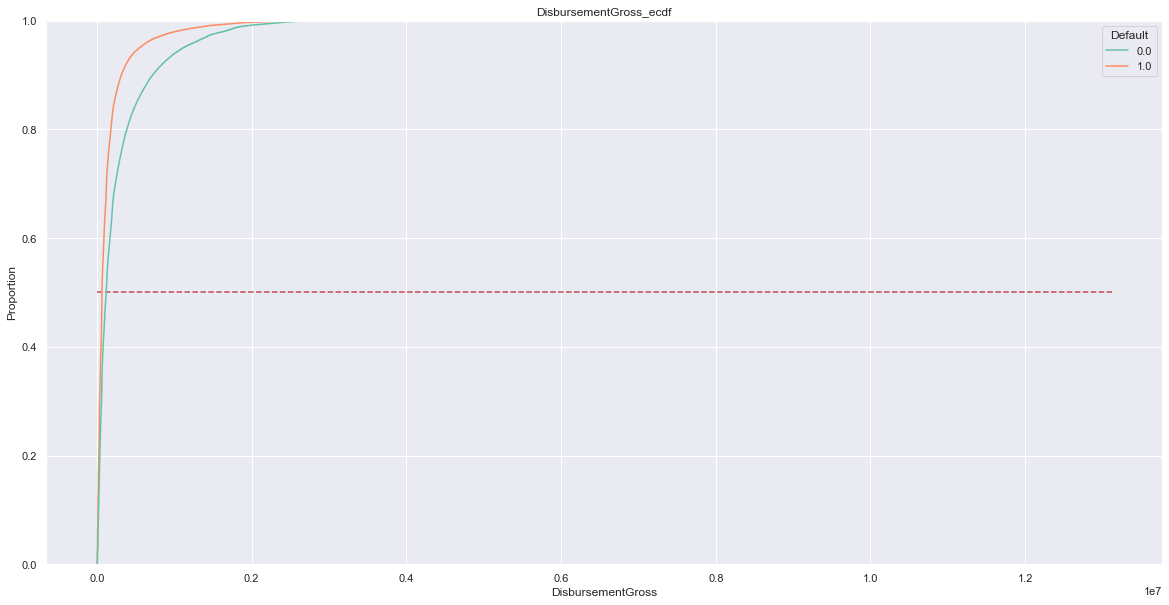

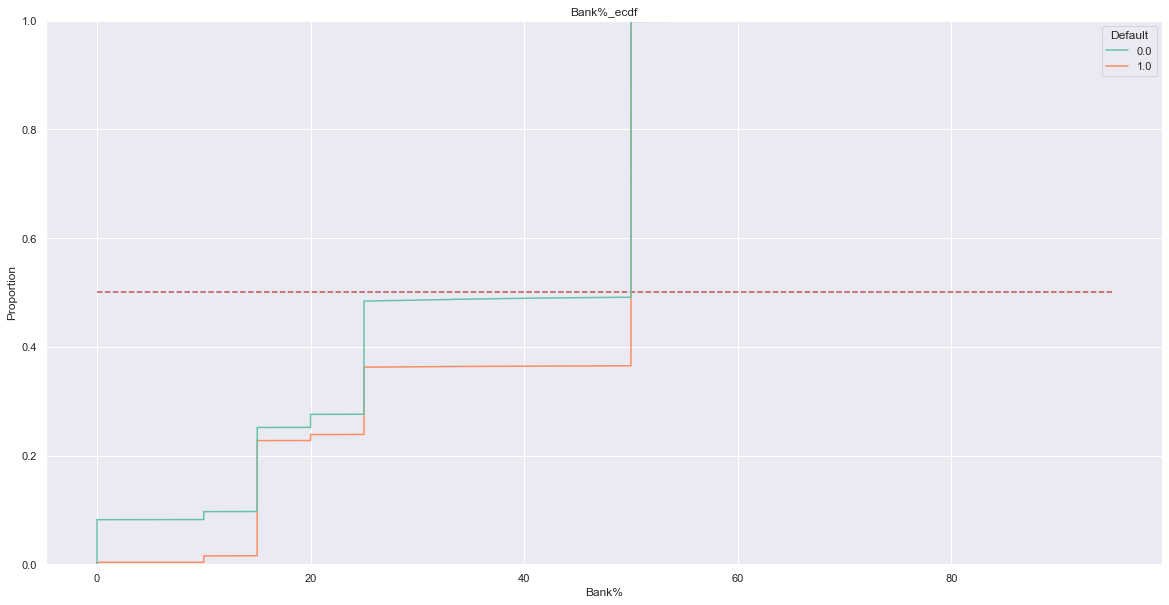

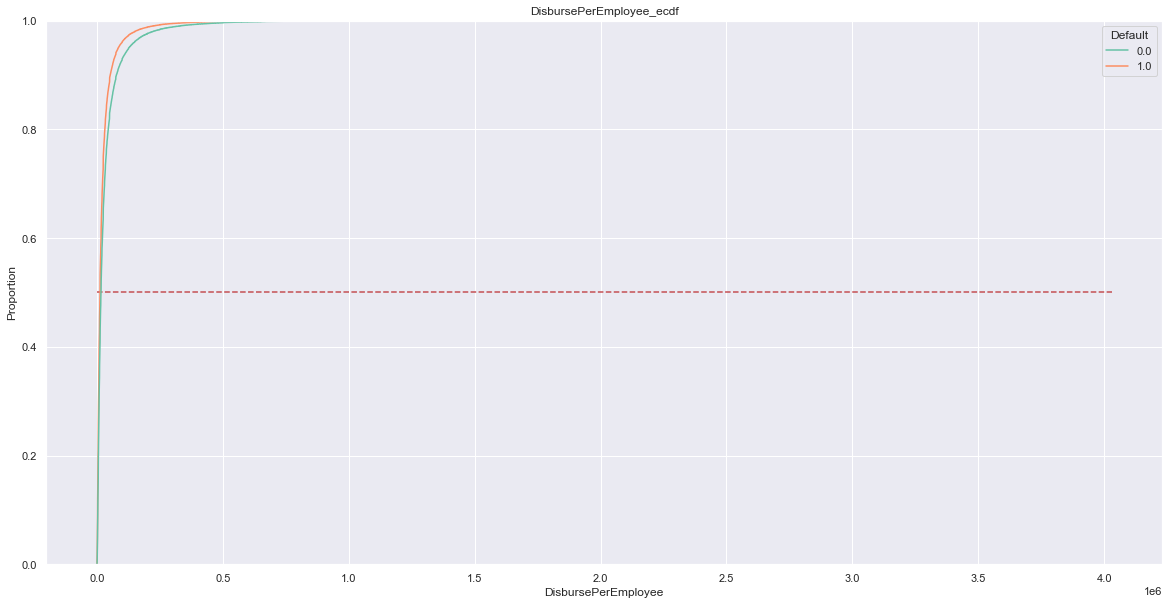

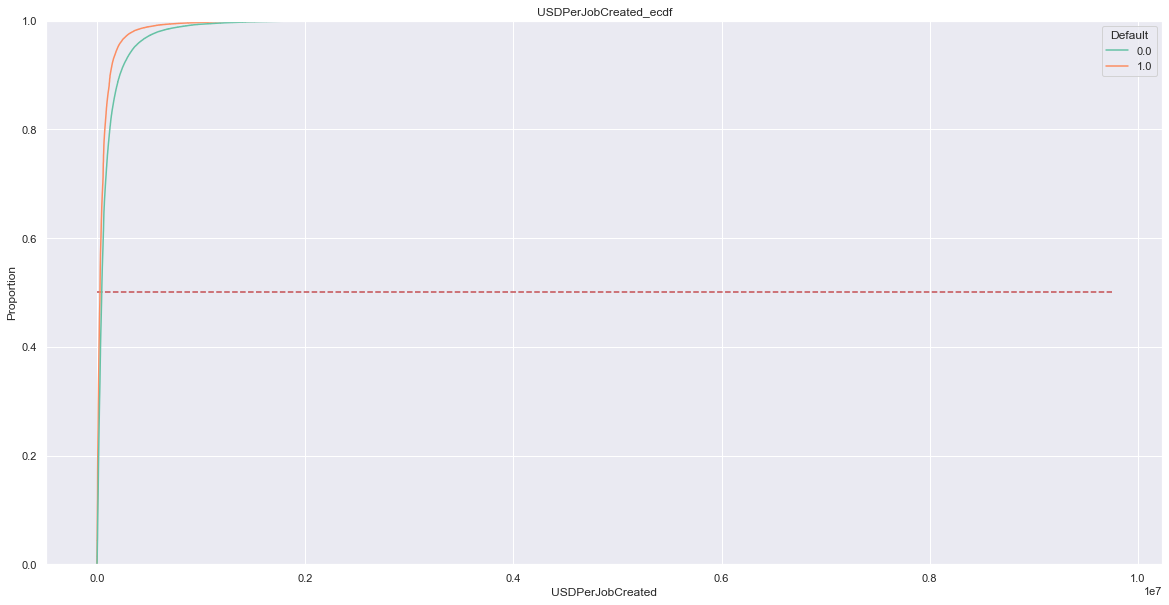

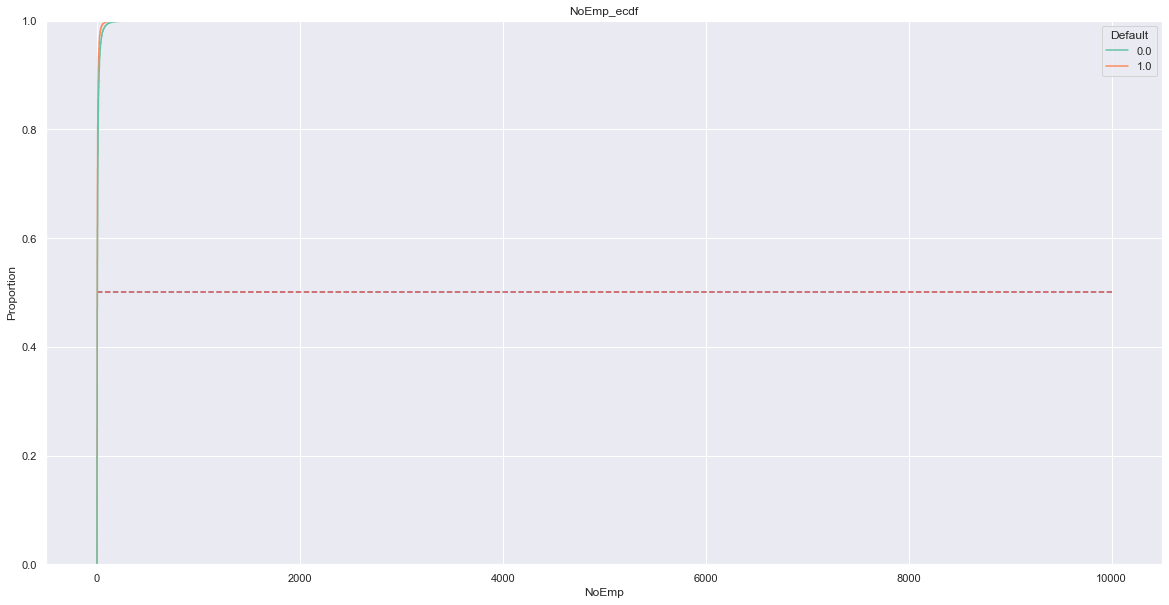

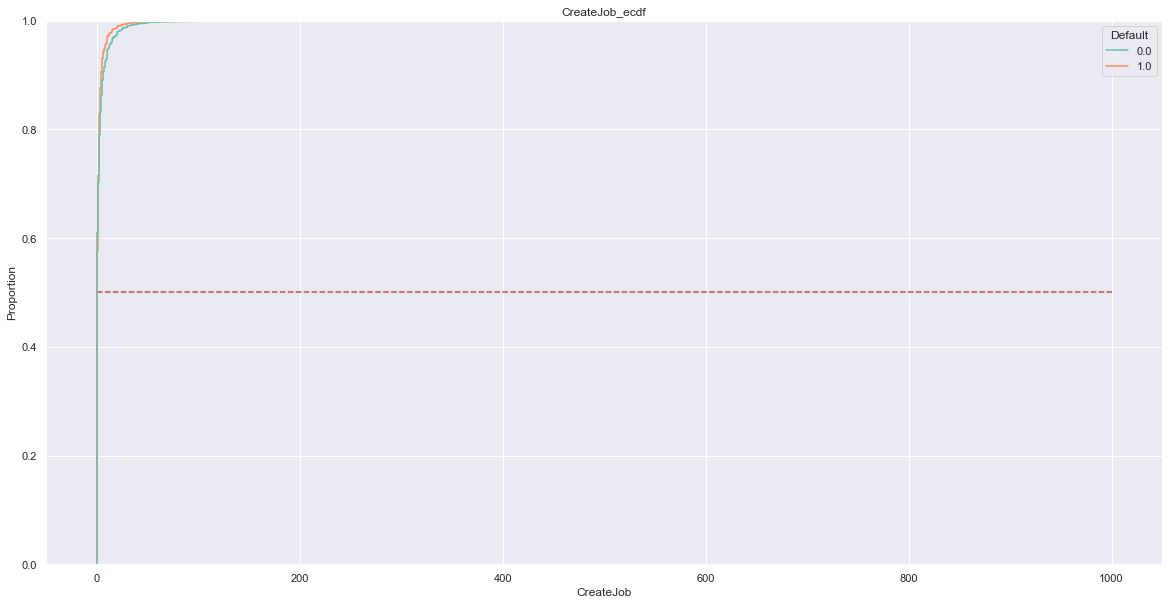

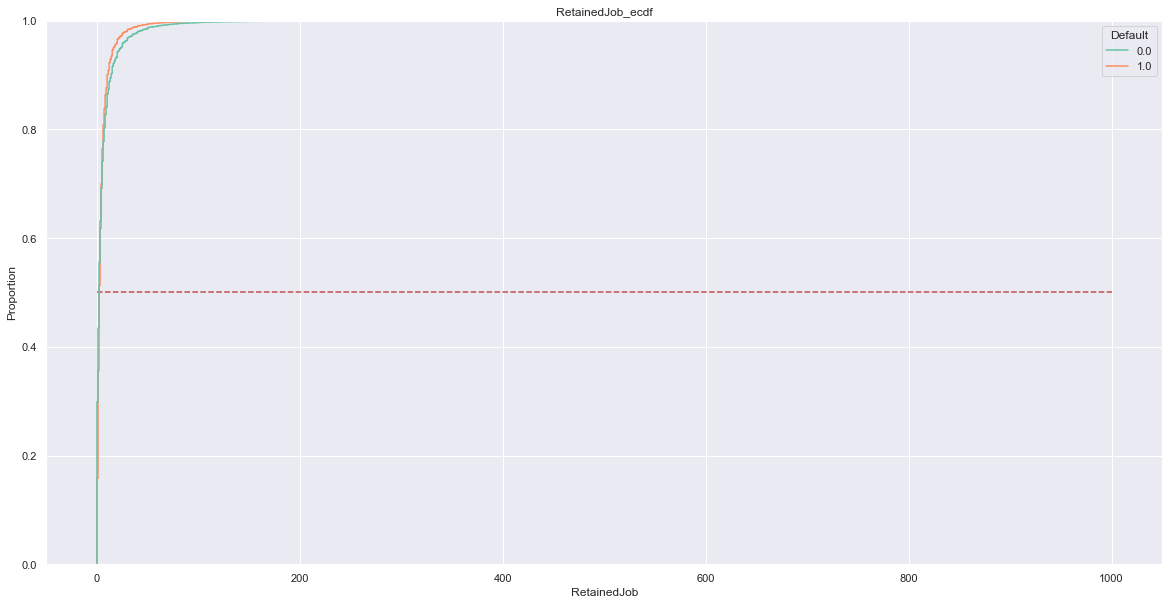

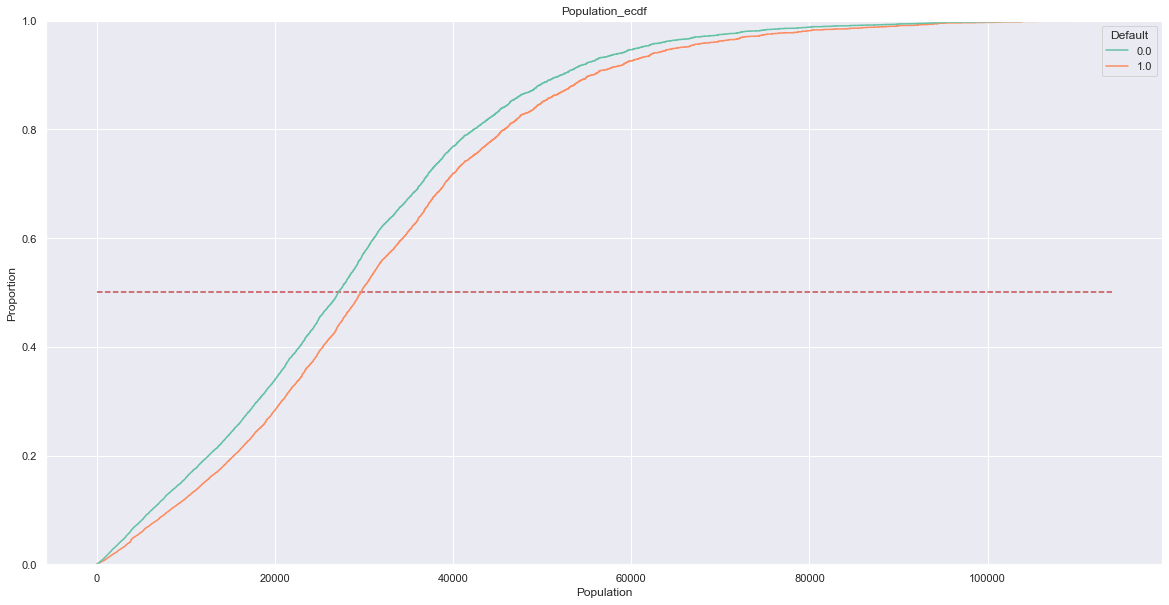

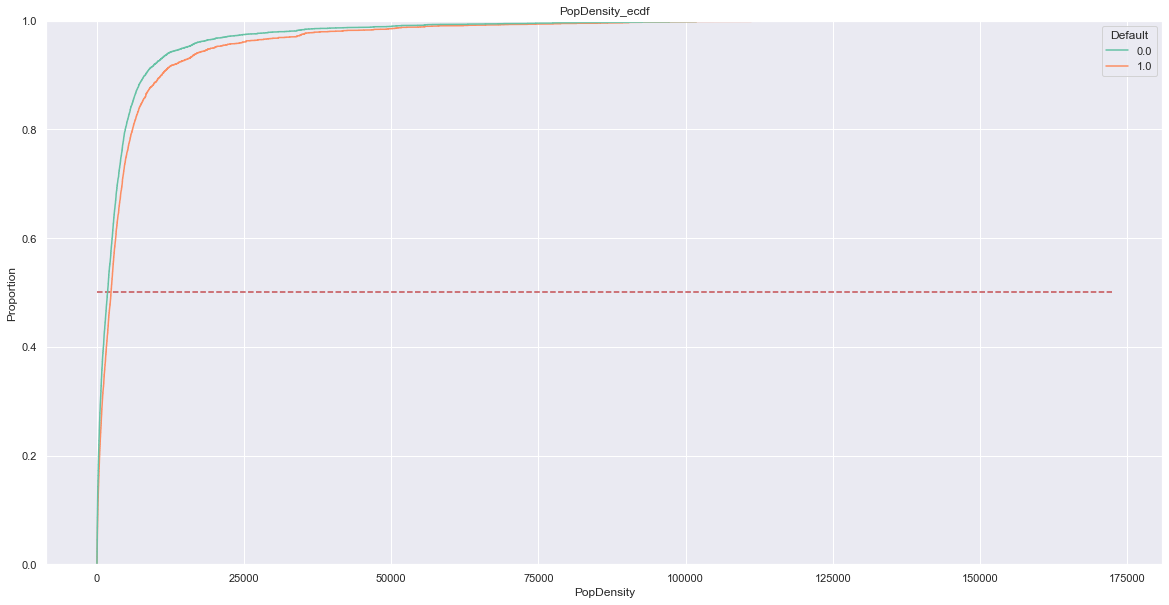

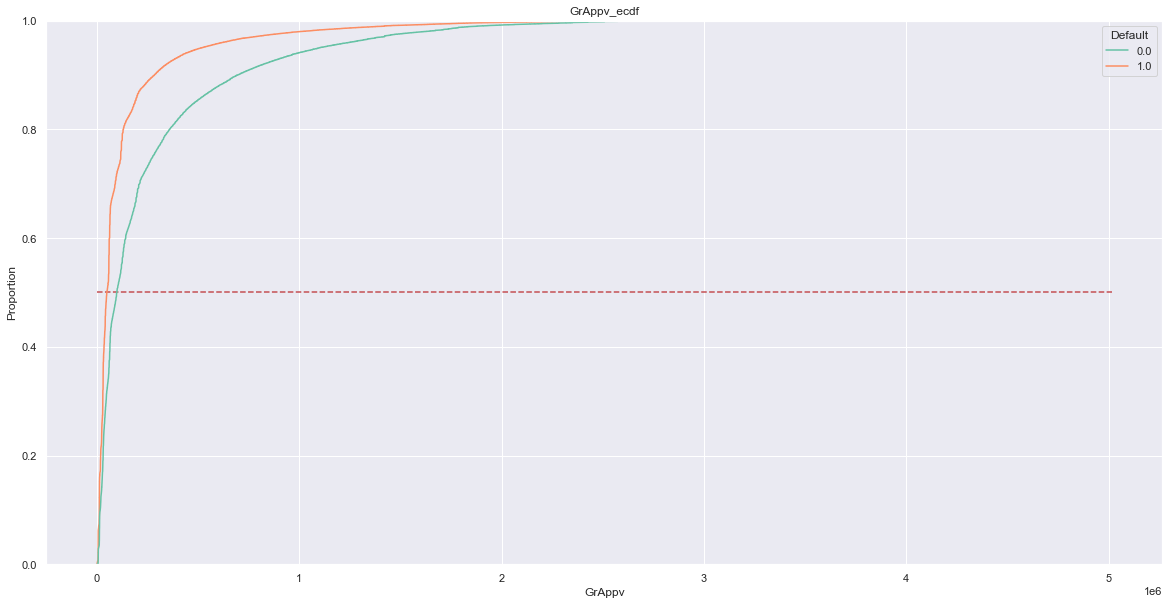

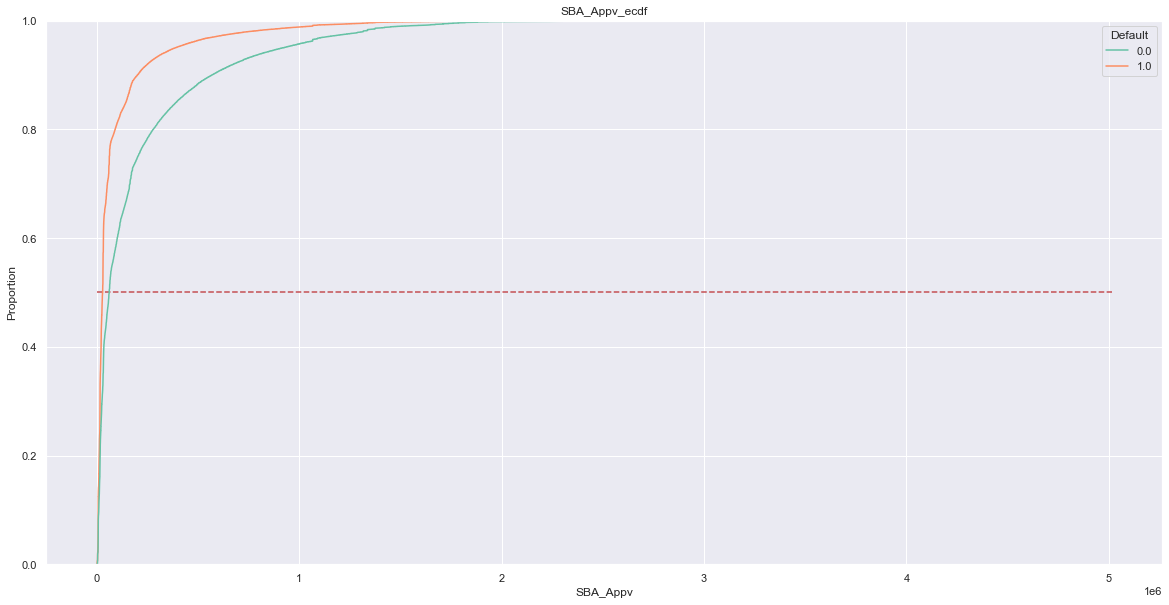

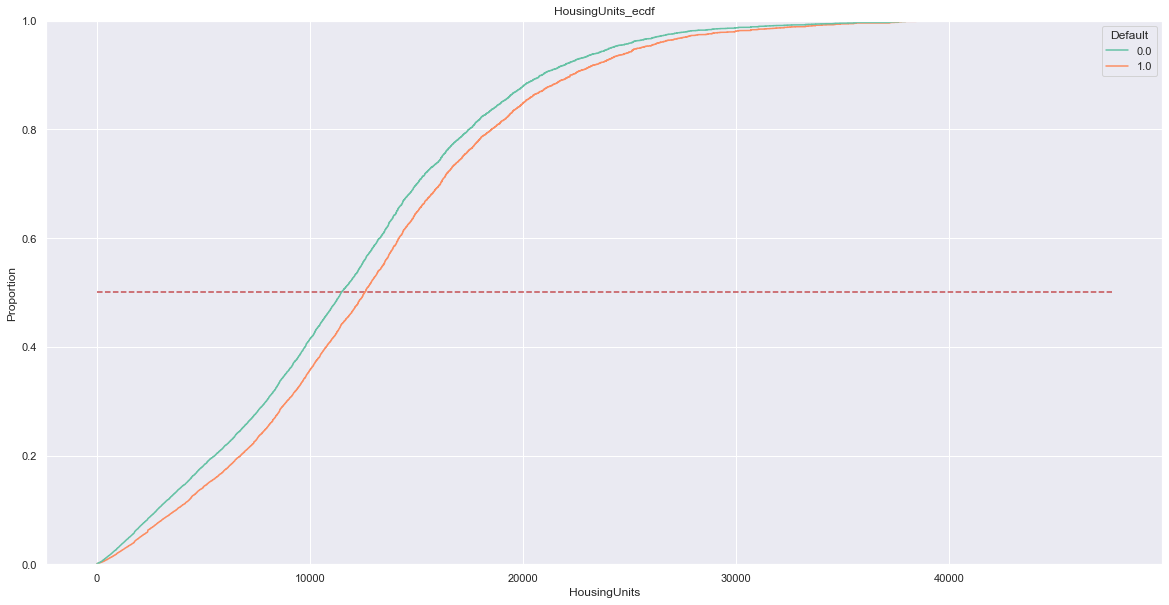

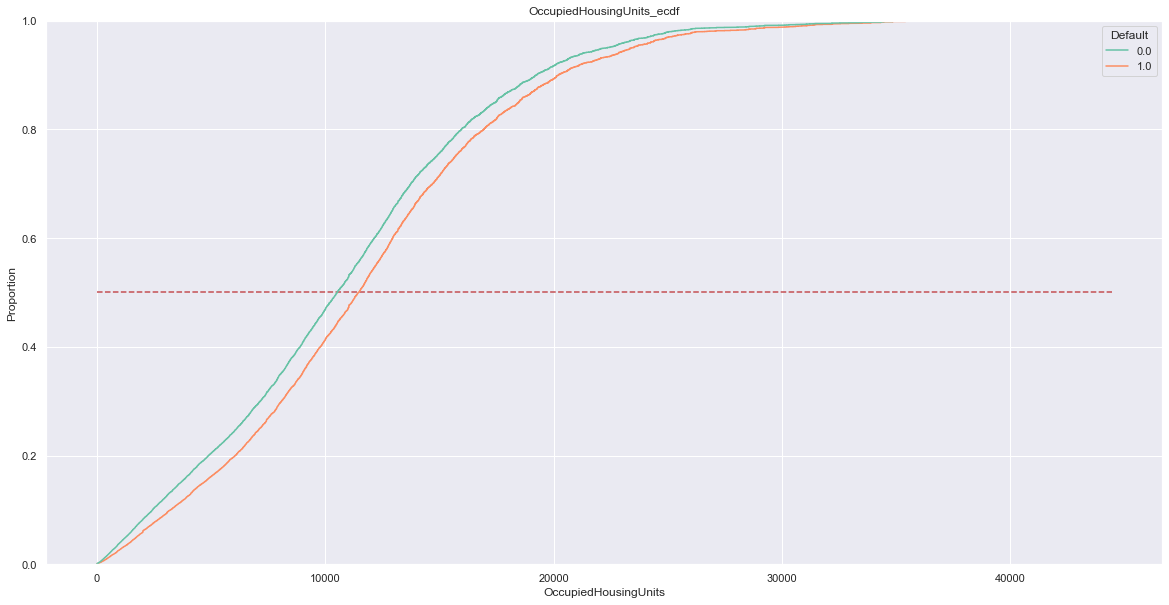

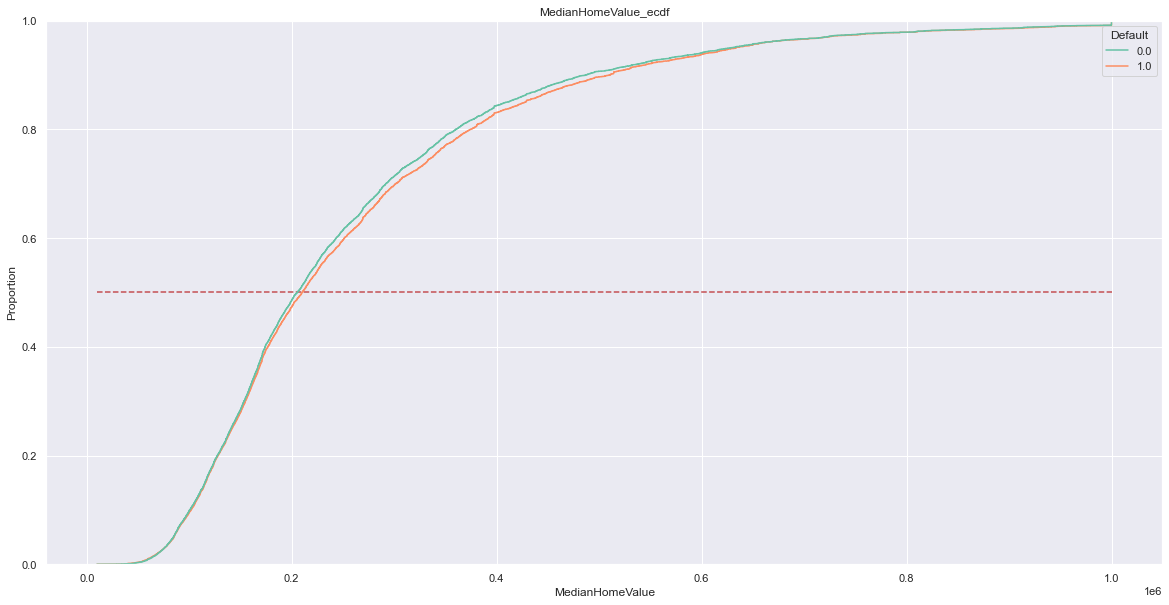

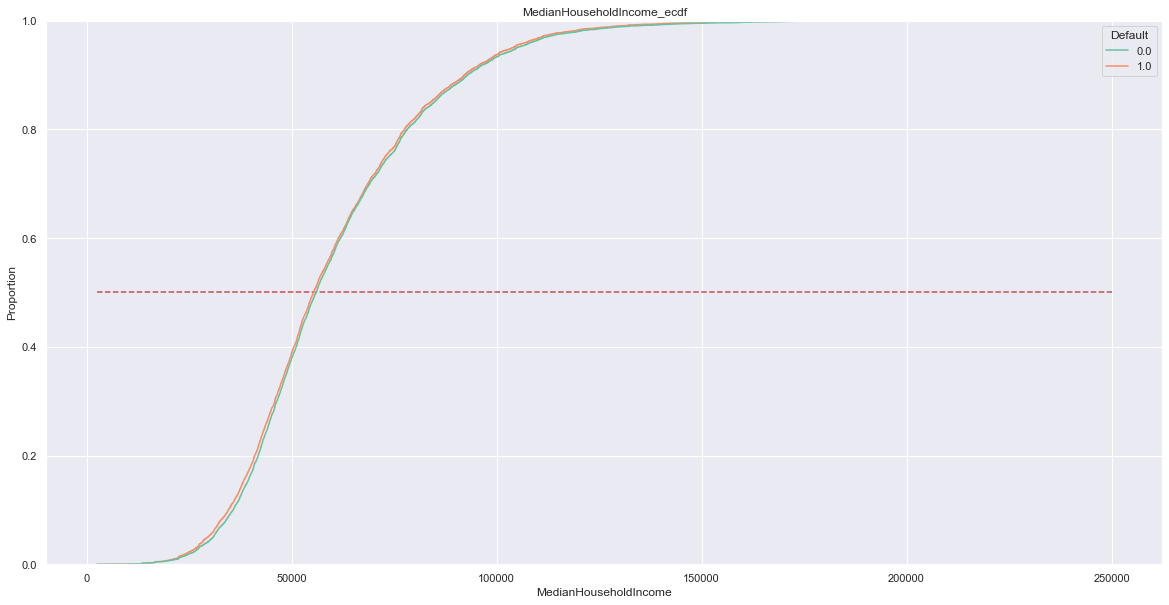

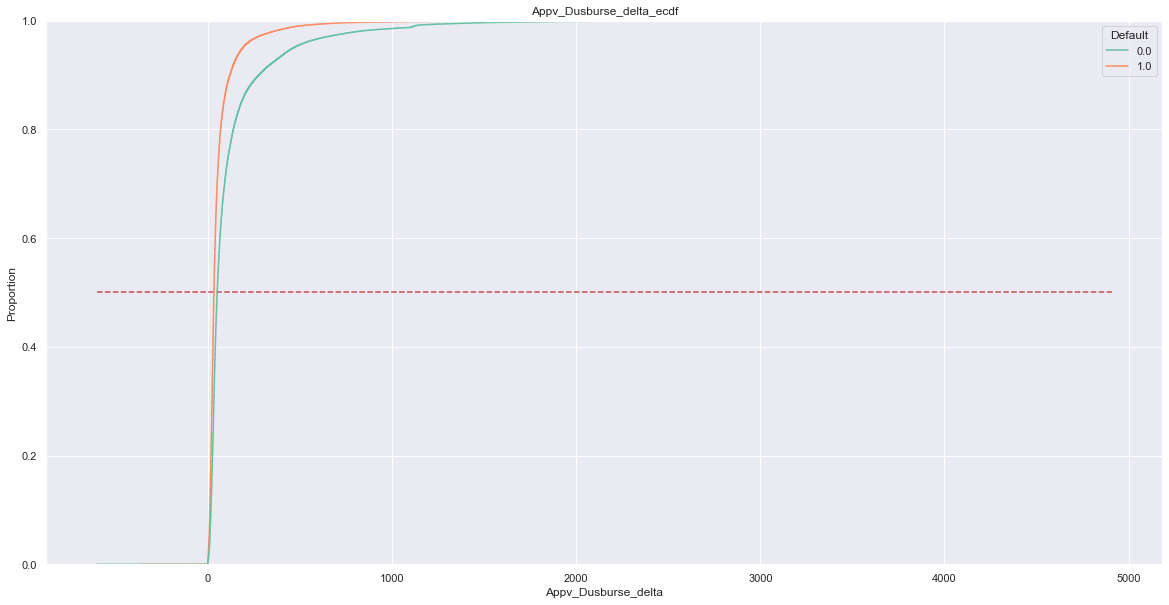

D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


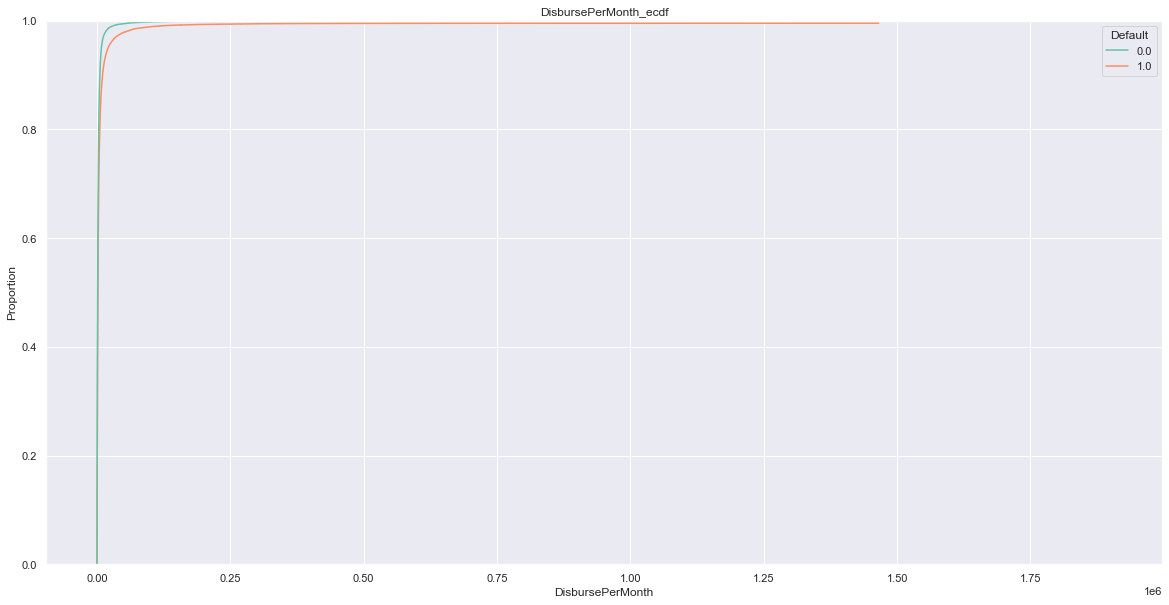

In [41]:
df_vis = df_copy.copy()
hue_col = 'Default'

for i in range(len(num_features)):
    if num_features[i] in [hue_col, 'ChgOffPrinGr']:
        continue

    num_col = num_features[i]
    vis = df_vis[[num_col, hue_col]]
    vis = vis[~(pd.isnull(vis[num_features[i]]))]

    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis[num_col] >= lwb) & (vis[num_col] <= upb)]

    plt.figure(figsize=(20, 10))
    sns.set_theme(style="darkgrid")
    title = num_col + '_ecdf'
    plt.title(title)
    plt.hlines(y=0.5, xmin=df_copy[num_col].min(), xmax=df_copy[num_col].max(), colors='r', linestyles='dashed')
    sns.ecdfplot(data=df_copy, x=num_col, hue='Default', palette=sns.color_palette("Set2")[:2])
    plt.savefig(title + '.jpeg')
    plt.show()
    df_vis = df_copy.copy()

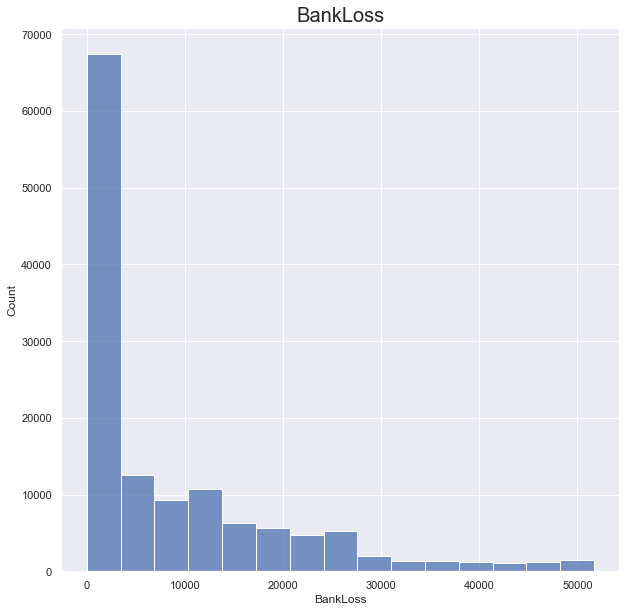

In [40]:
num_visualization(df_copy, num_features=['BankLoss'], exclude_outlier=2.5)

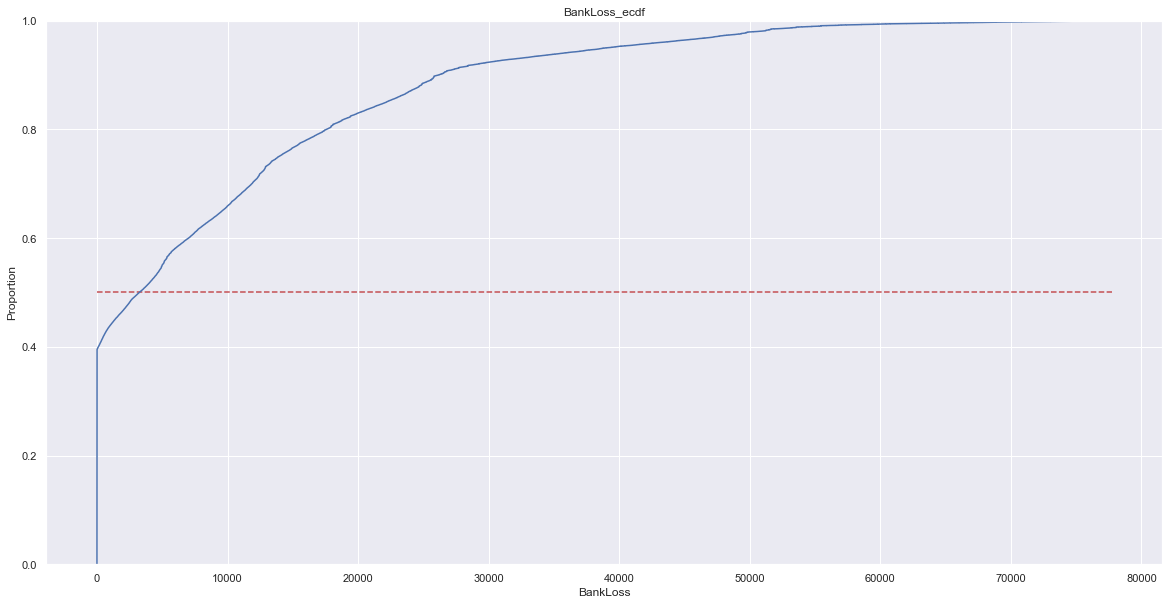

In [14]:
num_col = 'BankLoss'
df_vis = df_copy.copy()
df_vis = df_vis[~(pd.isnull(df_vis[num_col]))]

upb = np.percentile(df_vis[num_col], 99)
df_vis = df_vis[(df_vis[num_col] <= upb)]

plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
title = num_col + '_ecdf'
plt.title(title)
plt.hlines(y=0.5, xmin=df_vis[num_col].min(), xmax=df_vis[num_col].max(), colors='r', linestyles='dashed')
sns.ecdfplot(data=df_vis, x=num_col, palette=sns.color_palette("Set2")[:2])
plt.savefig(title + '.jpeg')
plt.show()

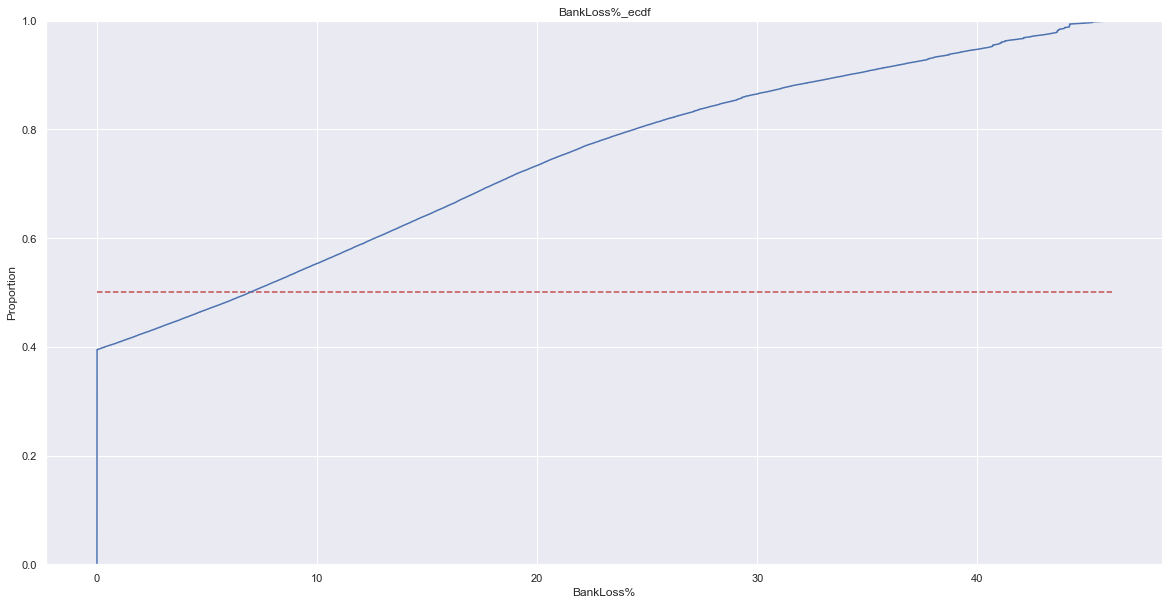

In [15]:
num_col = 'BankLoss%'
df_vis = df_copy.copy()
df_vis = df_vis[~(pd.isnull(df_vis[num_col]))]

upb = np.percentile(df_vis[num_col], 99)
df_vis = df_vis[(df_vis[num_col] <= upb)]

plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
title = num_col + '_ecdf'
plt.title(title)
plt.hlines(y=0.5, xmin=df_vis[num_col].min(), xmax=df_vis[num_col].max(), colors='r', linestyles='dashed')
sns.ecdfplot(data=df_vis, x=num_col, palette=sns.color_palette("Set2")[:2])
plt.savefig(title + '.jpeg')
plt.show()

In [8]:
df_copy['BankLoss'].describe()

count    135109.000
mean      10493.938
std       19249.789
min           0.000
25%           0.000
50%        3484.054
75%       14437.295
max     1213184.643
Name: BankLoss, dtype: float64

In [16]:
df_copy['BankLoss%'].describe()

count   135109.000
mean        12.232
std         13.942
min          0.000
25%          0.000
50%          7.223
75%         21.458
max         69.798
Name: BankLoss%, dtype: float64

In [17]:
df_copy['Default'].describe()

count   530453.000
mean         0.257
std          0.437
min          0.000
25%          0.000
50%          0.000
75%          1.000
max          1.000
Name: Default, dtype: float64

In [19]:
df_copy['Default'].value_counts()

0.000    394129
1.000    136324
Name: Default, dtype: int64

In [23]:
df_copy['ChgOffPrinGr'].sum() / 10

1029063996.9125255

In [26]:
df_copy['ChgOffPrinGr'].sum() / df_copy['DisbursementGross'].sum()

0.08201160749979357

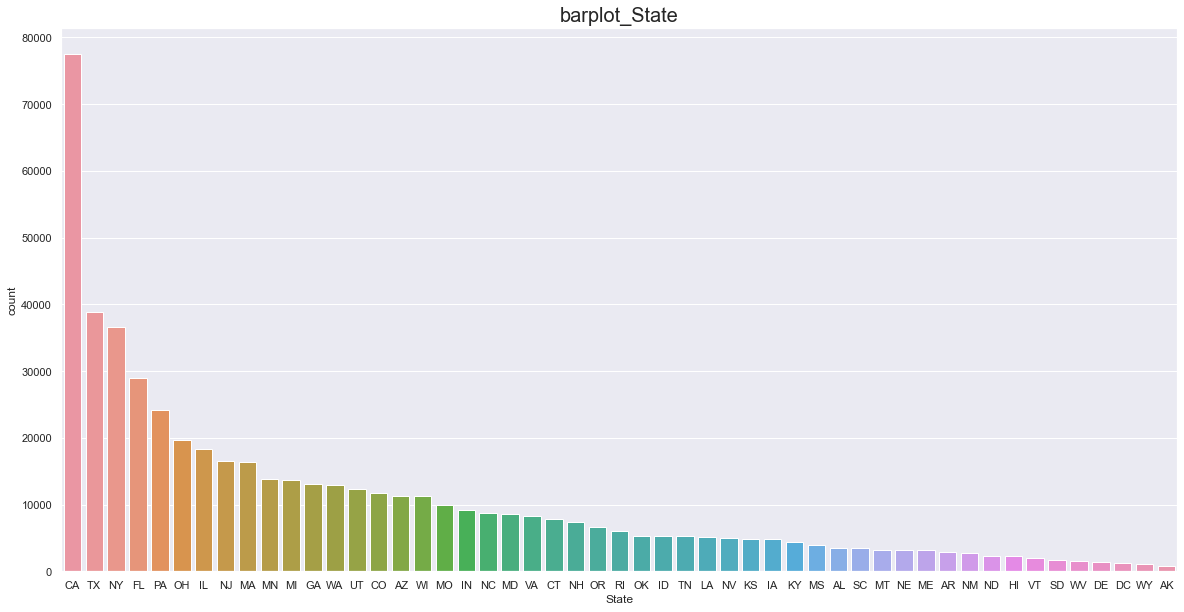

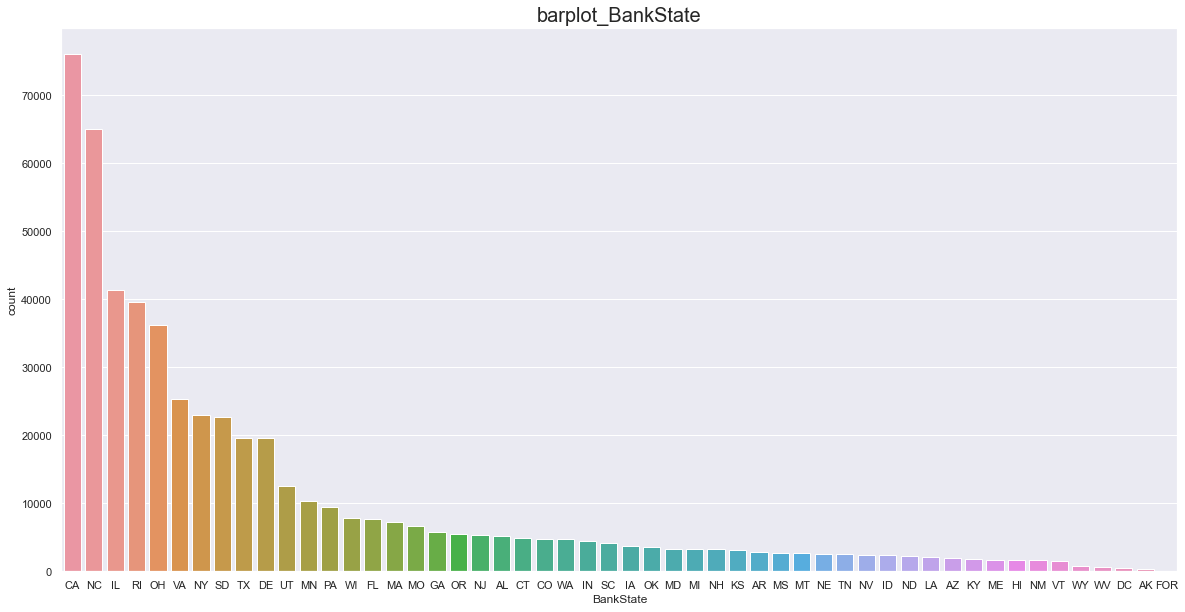

In [27]:
obj_visualization(df_copy, obj_features=['State', 'BankState'])